# Exploring Twitter Data to Understand Communities: Clustering, Key-word Analysis & Sentiment Analysis

**Disclaimer** - Since K-means clustering chooses initial centroids randomly the clusters formed will change a little bit everytime we run the code. Hence, the results and the visualization changes cluster to cluster everytime we try to reproduce the results.

Needless to say, the results are almost consistent everytime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Import all the packages

In [ ]:
import pandas as pd
import numpy as np
import os
import glob
from collections import OrderedDict
import operator
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import silhouette_visualizer
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings("ignore")
import gensim.corpora as corpora
import gensim
from gensim.models import CoherenceModel
import seaborn as sns

# Install all the needed dependencies

In [ ]:
# Run this code to see LDA visualization
!pip install pyLDAvis
!pip install "pandas<2.0.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas-2.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.1
    Uninstalling pandas-2.0.1:
      Successfully uninstalled pandas-2.0.1
ERROR: pip's dependency resolver does

In [ ]:
import pyLDAvis.gensim_models

In [ ]:
import nltk
import string
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)

words = set(nltk.corpus.words.words())
from geopy.geocoders import Nominatim
from geopy.geocoders import Photon
from folium.plugins import MarkerCluster
import folium

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
import os

import matplotlib.pyplot as plt

In [ ]:
!pip install vaderSentiment
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from afinn import Afinn


In [ ]:
#install sumy for summarization
!pip install sumy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# POLITICS COMMUNITY



## Read the data from CSV file


In [ ]:
#politics_us_df = pd.read_csv("politicsus_csv.csv")
data = pd.read_csv("/content/sample_data/politicsus_csv.csv")
#data = pd.read_csv("politicsus_csv.csv")

In [ ]:
data.head()

,user,location,tweet
0,Dmarlanawilson,KANSAS,Biden admin admits it left hundreds more US ci...
1,RepKristina,"Green Bay, WI",I hope your mentorship of new leaders will pro...
2,rogersonkaren,USA,'It has gone too far': Listen to Cheney read o...
3,le_petit_trek,"Vulcan, Alberta",@maxfawcett This might be the dumbest thing I ...
4,Plauterborn,"San Francisco, CA",People are only conservative until it hits the...


## DATA CLEANING

## Defining a custom stopwords list for futher cleaning of tweets


In [ ]:

long_stopwords_list=["a",
"able",
"about",
"above",
"abst",
"accordance",
"according",
"accordingly",
"across",
"act",
"actually",
"added",
"adj",
"affected",
"affecting",
"affects",
"after",
"afterwards",
"again",
"against",
"ah",
"all",
"almost",
"alone",
"along",
"already",
"also",
"although",
"always",
"am",
"among",
"amongst",
"an",
"and",
"announce",
"another",
"any",
"anybody",
"anyhow",
"anymore",
"anyone",
"anything",
"anyway",
"anyways",
"anywhere",
"apparently",
"approximately",
"are",
"aren",
"arent",
"arise",
"around",
"as",
"aside",
"ask",
"asking",
"at",
"auth",
"available",
"away",
"awfully",
"b",
"back",
"be",
"became",
"because",
"become",
"becomes",
"becoming",
"been",
"before",
"beforehand",
"begin",
"beginning",
"beginnings",
"begins",
"behind",
"being",
"believe",
"below",
"beside",
"besides",
"between",
"beyond",
"biol",
"both",
"brief",
"briefly",
"but",
"by",
"c",
"ca",
"came",
"can",
"cannot",
"can't",
"cause",
"causes",
"certain",
"certainly",
"co",
"com",
"come",
"comes",
"contain",
"containing",
"contains",
"could",
"couldnt",
"d",
"date",
"did",
"didn't",
"different",
"do",
"does",
"doesn't",
"doing",
"done",
"don't",
"down",
"downwards",
"due",
"during",
"e",
"each",
"ed",
"edu",
"effect",
"eg",
"eight",
"eighty",
"either",
"else",
"elsewhere",
"end",
"ending",
"enough",
"especially",
"et",
"et-al",
"etc",
"even",
"ever",
"every",
"everybody",
"everyone",
"everything",
"everywhere",
"ex",
"except",
"f",
"far",
"few",
"ff",
"fifth",
"first",
"five",
"fix",
"followed",
"following",
"follows",
"for",
"former",
"formerly",
"forth",
"found",
"four",
"from",
"further",
"furthermore",
"g",
"gave",
"get",
"gets",
"getting",
"give",
"given",
"gives",
"giving",
"go",
"goes",
"gone",
"got",
"gotten",
"h",
"had",
"happens",
"hardly",
"has",
"hasn't",
"have",
"haven't",
"having",
"he",
"hed",
"hence",
"her",
"here",
"hereafter",
"hereby",
"herein",
"heres",
"hereupon",
"hers",
"herself",
"hes",
"hi",
"hid",
"him",
"himself",
"his",
"hither",
"home",
"how",
"howbeit",
"however",
"hundred",
"i",
"id",
"ie",
"if",
"i'll",
"im",
"immediate",
"immediately",
"importance",
"important",
"in",
"inc",
"indeed",
"index",
"information",
"instead",
"into",
"invention",
"inward",
"is",
"isn't",
"it",
"itd",
"it'll",
"its",
"itself",
"i've",
"j",
"just",
"k",
"keep	",
"keeps",
"kept",
"kg",
"km",
"know",
"known",
"knows",
"l",
"largely",
"last",
"lately",
"later",
"latter",
"latterly",
"least",
"less",
"lest",
"let",
"lets",
"like",
"liked",
"likely",
"line",
"little",
"'ll",
"look",
"looking",
"looks",
"ltd",
"m",
"made",
"mainly",
"make",
"makes",
"many",
"may",
"maybe",
"me",
"mean",
"means",
"meantime",
"meanwhile",
"merely",
"mg",
"might",
"million",
"miss",
"ml",
"more",
"moreover",
"most",
"mostly",
"mr",
"mrs",
"much",
"mug",
"must",
"my",
"myself",
"n",
"na",
"name",
"namely",
"nay",
"nd",
"near",
"nearly",
"necessarily",
"necessary",
"need",
"needs",
"neither",
"never",
"nevertheless",
"new",
"next",
"nine",
"ninety",
"no",
"nobody",
"non",
"none",
"nonetheless",
"noone",
"nor",
"normally",
"nos",
"not",
"noted",
"nothing",
"now",
"nowhere",
"o",
"obtain",
"obtained",
"obviously",
"of",
"off",
"often",
"oh",
"ok",
"okay",
"old",
"omitted",
"on",
"once",
"one",
"ones",
"only",
"onto",
"or",
"ord",
"other",
"others",
"otherwise",
"ought",
"our",
"ours",
"ourselves",
"out",
"outside",
"over",
"overall",
"owing",
"own",
"p",
"page",
"pages",
"part",
"particular",
"particularly",
"past",
"per",
"perhaps",
"placed",
"please",
"plus",
"poorly",
"possible",
"possibly",
"potentially",
"pp",
"predominantly",
"present",
"previously",
"primarily",
"probably",
"promptly",
"proud",
"provides",
"put",
"q",
"que",
"quickly",
"quite",
"qv",
"r",
"ran",
"rather",
"rd",
"re",
"readily",
"really",
"recent",
"recently",
"ref",
"refs",
"regarding",
"regardless",
"regards",
"related",
"relatively",
"research",
"respectively",
"resulted",
"resulting",
"results",
"right",
"run",
"s",
"said",
"same",
"saw",
"say",
"saying",
"says",
"sec",
"section",
"see",
"seeing",
"seem",
"seemed",
"seeming",
"seems",
"seen",
"self",
"selves",
"sent",
"seven",
"several",
"shall",
"she",
"shed",
"she'll",
"shes",
"should",
"shouldn't",
"show",
"showed",
"shown",
"showns",
"shows",
"significant",
"significantly",
"similar",
"similarly",
"since",
"six",
"slightly",
"so",
"some",
"somebody",
"somehow",
"someone",
"somethan",
"something",
"sometime",
"sometimes",
"somewhat",
"somewhere",
"soon",
"sorry",
"specifically",
"specified",
"specify",
"specifying",
"still",
"stop",
"strongly",
"sub",
"substantially",
"successfully",
"such",
"sufficiently",
"suggest",
"sup",
"sure	",
"take",
"taken",
"taking",
"tell",
"tends",
"th",
"than",
"thank",
"thanks",
"thanx",
"that",
"that'll",
"thats",
"that've",
"the",
"their",
"theirs",
"them",
"themselves",
"then",
"thence",
"there",
"thereafter",
"thereby",
"thered",
"therefore",
"therein",
"there'll",
"thereof",
"therere",
"theres",
"thereto",
"thereupon",
"there've",
"these",
"they",
"theyd",
"they'll",
"theyre",
"they've",
"think",
"this",
"those",
"thou",
"though",
"thoughh",
"thousand",
"throug",
"through",
"throughout",
"thru",
"thus",
"til",
"tip",
"to",
"together",
"too",
"took",
"toward",
"towards",
"tried",
"tries",
"truly",
"try",
"trying",
"ts",
"twice",
"two",
"u",
"un",
"under",
"unfortunately",
"unless",
"unlike",
"unlikely",
"until",
"unto",
"up",
"upon",
"ups",
"us",
"use",
"used",
"useful",
"usefully",
"usefulness",
"uses",
"using",
"usually",
"v",
"value",
"various",
"'ve",
"very",
"via",
"viz",
"vol",
"vols",
"vs",
"w",
"want",
"wants",
"was",
"wasnt",
"way",
"we",
"wed",
"welcome",
"we'll",
"went",
"were",
"werent",
"we've",
"what",
"whatever",
"what'll",
"whats",
"when",
"whence",
"whenever",
"where",
"whereafter",
"whereas",
"whereby",
"wherein",
"wheres",
"whereupon",
"wherever",
"whether",
"which",
"while",
"whim",
"whither",
"who",
"whod",
"whoever",
"whole",
"who'll",
"whom",
"whomever",
"whos",
"whose",
"why",
"widely",
"willing",
"wish",
"with",
"within",
"without",
"wont",
"words",
"world",
"would",
"wouldnt",
"www",
"x",
"y",
"yes",
"yet",
"you",
"youd",
"you'll",
"your",
"youre",
"yours",
"yourself",
"yourselves",
"you've",
"z",
"zero","amp"]


# Data cleaning with all the required essential functions

In [ ]:
import re
from nltk.corpus import stopwords
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)

    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0)

    if len(tchr) > 1:
        return tchr[0:2]

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

def remove_stopwords2(text):
    text = ' '.join([word for word in text.split() if word not in (long_stopwords_list)])
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize_word(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in words]
    lemmatized_tweet = ' '.join(lemmatized_words)
    return lemmatized_tweet


# Apply functions on tweets
data['tweet'] = data['tweet'].apply(lambda x : remove_username(x))
data['tweet'] = data['tweet'].apply(lambda x : remove_url(x))
data['tweet'] = data['tweet'].apply(lambda x : remove_emoji(x))
data['tweet'] = data['tweet'].apply(lambda x : decontraction(x))
data['tweet'] = data['tweet'].apply(lambda x : seperate_alphanumeric(x))
data['tweet'] = data['tweet'].apply(lambda x : unique_char(cont_rep_char,x))
data['tweet'] = data['tweet'].apply(lambda x : char(x))
data['tweet'] = data['tweet'].apply(lambda x : x.lower())
data['tweet'] = data['tweet'].apply(lambda x : lemmatize_word(x))
data['tweet'] = data['tweet'].apply(lambda x : remove_stopwords(x))
data['tweet'] = data['tweet'].apply(lambda x : remove_stopwords2(x))

In [ ]:
data['tweet']

0      biden admin admit leave hundreds citizens afgh...
1      hope mentorship leaders provide critical insti...
2      listen cheney read texts trump jr hannity ingr...
3              dumbest thing read canadian politics well
4               people conservative hit personally shock
                             ...                        
894    man legal background knowledge laws bill pass ...
895    well prosecute assange espionage publish embar...
896    imagine brainwash mainstream media resort hash...
897    federal government radio airwaves lease airwav...
898             kudlow sure government spend foxbusiness
Name: tweet, Length: 899, dtype: object

# Tokenized cleaned words


In [ ]:
data['tokenized_sents'] = data.apply(lambda data: nltk.word_tokenize(data['tweet']), axis=1)

In [ ]:
data['tokenized_sents']

0      [biden, admin, admit, leave, hundreds, citizen...
1      [hope, mentorship, leaders, provide, critical,...
2      [listen, cheney, read, texts, trump, jr, hanni...
3       [dumbest, thing, read, canadian, politics, well]
4         [people, conservative, hit, personally, shock]
                             ...                        
894    [man, legal, background, knowledge, laws, bill...
895    [well, prosecute, assange, espionage, publish,...
896    [imagine, brainwash, mainstream, media, resort...
897    [federal, government, radio, airwaves, lease, ...
898       [kudlow, sure, government, spend, foxbusiness]
Name: tokenized_sents, Length: 899, dtype: object

In [ ]:
master_text = [item for sublist in data['tokenized_sents'].to_list() for item in sublist]


In [ ]:
dictW = {}
def uniqueL(word):
    if word in dictW:
        dictW[words] += 1
    else:
        dictW.update({words: 1})

for words in master_text:
        uniqueL(words)

In [ ]:
len(dictW)

3633

In [ ]:
sorted_items = sorted(dictW.items(), key=operator.itemgetter(1), reverse=True)
freq__dictW = OrderedDict()
for k, v in sorted_items:
    freq__dictW[k] = v


# Processing the top words for further processing

In [ ]:
top_words = []
counter = 0
for key,value in freq__dictW.items():
    top_words.append(key)
    counter += 1
    if counter == 1000:
        break

# Vectorizing the tweets with respect to the top words

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=200000)

tfidf_vectorizer.fit(top_words)
tfidf_matrix =tfidf_vectorizer.transform(data.tweet)
feature_names = tfidf_vectorizer.get_feature_names_out()


In [ ]:
len(feature_names)

1000

In [ ]:
print(tfidf_matrix.toarray())

[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.2773501 0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]


In [ ]:
print(tfidf_matrix.shape)

(899, 1000)


## These are the vectorized tweets


In [ ]:
pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index = data.user)

,abide,ability,abortion,absolutely,accord,accountable,achieve,action,actual,address,...,worry,wow,write,wrong,ya,yeah,year,years,york,yrs
user,,,,,,,,,,,,,,,,,,,,,
Dmarlanawilson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0
RepKristina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27735,0.00000,0.0
rogersonkaren,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0
le_petit_trek,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0
Plauterborn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ga21Renee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0
POmi7798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.27735,0.0
tydelrosedrums,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.258199,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0


# PHASE 1: CLUSTERING

# Elbow method for deciding the optimal k


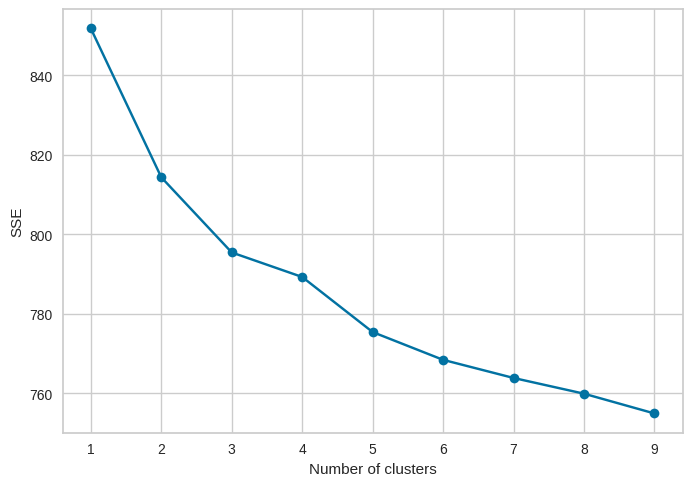

In [ ]:
SSE_list = []
for i in range(1, 10):
    kmeans_sse = KMeans(
        n_clusters=i, init='random', max_iter=300,
        tol=1e-04, random_state=0
    )
    kmeans_sse.fit(tfidf_matrix)
    SSE_list.append(kmeans_sse.inertia_)
plt.plot(range(1, 10), SSE_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Silhouette scores for the clusters from 2 to 10

In [ ]:
silhouette = []
for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(tfidf_matrix)
    score = silhouette_score(tfidf_matrix, preds)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.04303511661390896)
For n_clusters = 3, silhouette score is 0.05076763203751726)
For n_clusters = 4, silhouette score is 0.05857467692558668)
For n_clusters = 5, silhouette score is 0.03817230420148244)
For n_clusters = 6, silhouette score is 0.04489902512609995)
For n_clusters = 7, silhouette score is 0.04040069521643852)
For n_clusters = 8, silhouette score is 0.0503960108619196)
For n_clusters = 9, silhouette score is 0.04727893656803842)


## Here, the optimal cluster found is 5 from the elbow method as well as silhouette analysis

# Now, we perform K-means clustering for the technology data for forming the clusters

In [ ]:
num_clusters = 5

km = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=1)

km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

In [ ]:
km.cluster_centers_.argsort()[:, ::-1]

array([[398, 644, 628, ..., 447, 448,   0],
       [924, 561, 483, ..., 339, 341,   0],
       [665, 644, 882, ..., 670, 668, 999],
       [581, 398, 884, ..., 626, 624,   0],
       [906, 398, 644, ..., 614, 613,   0]])

# These are the top terms per cluster

In [ ]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()
store_politics_clusters = []
for i in range(num_clusters):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :5]:
        print (' %s' % terms[ind])
    temp = []
    for ind in sorted(order_centroids[i, :]):
            if order_centroids[i,ind]>= 700:
              temp.append(terms[ind])
    store_politics_clusters.append(temp)


Top terms per cluster:
Cluster 0:
 government
 people
 overthrow
 state
 work
Cluster 1:
 trump
 meadows
 jan
 news
 gop
Cluster 2:
 politics
 people
 talk
 agree
 news
Cluster 3:
 money
 government
 tax
 pay
 jan
Cluster 4:
 time
 government
 people
 rebel
 control


# We proceed with Dimensionality reduction using Multidimensionality scaling method

## For this we define a error term as the cosine similarity distance matrix using which we will subtract the actual matrix and pass it to the MDS method

In [ ]:
dist = 1 - cosine_similarity(tfidf_matrix)
dist

array([[-2.22044605e-16,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00, -6.66133815e-16,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00, -2.22044605e-16, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       ...,
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.11022302e-16,  8.66666667e-01,  8.70900555e-01],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         8.66666667e-01, -2.22044605e-16,  7.41801110e-01],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         8.70900555e-01,  7.41801110e-01,  0.00000000e+00]])

In [ ]:
userid_politics = data.user
location_politics = data.location

# Implementing the MDS method

In [ ]:
MDS()
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

In [ ]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

cluster_names = {0: 'politics_Cluster 0',
                 1: 'politics_Cluster 1',
                 2: 'politics_Cluster 2',
                 3: 'politics_Cluster 3',
                 4: 'politics_Cluster 4'}

# Visualizing the clusters with usernames

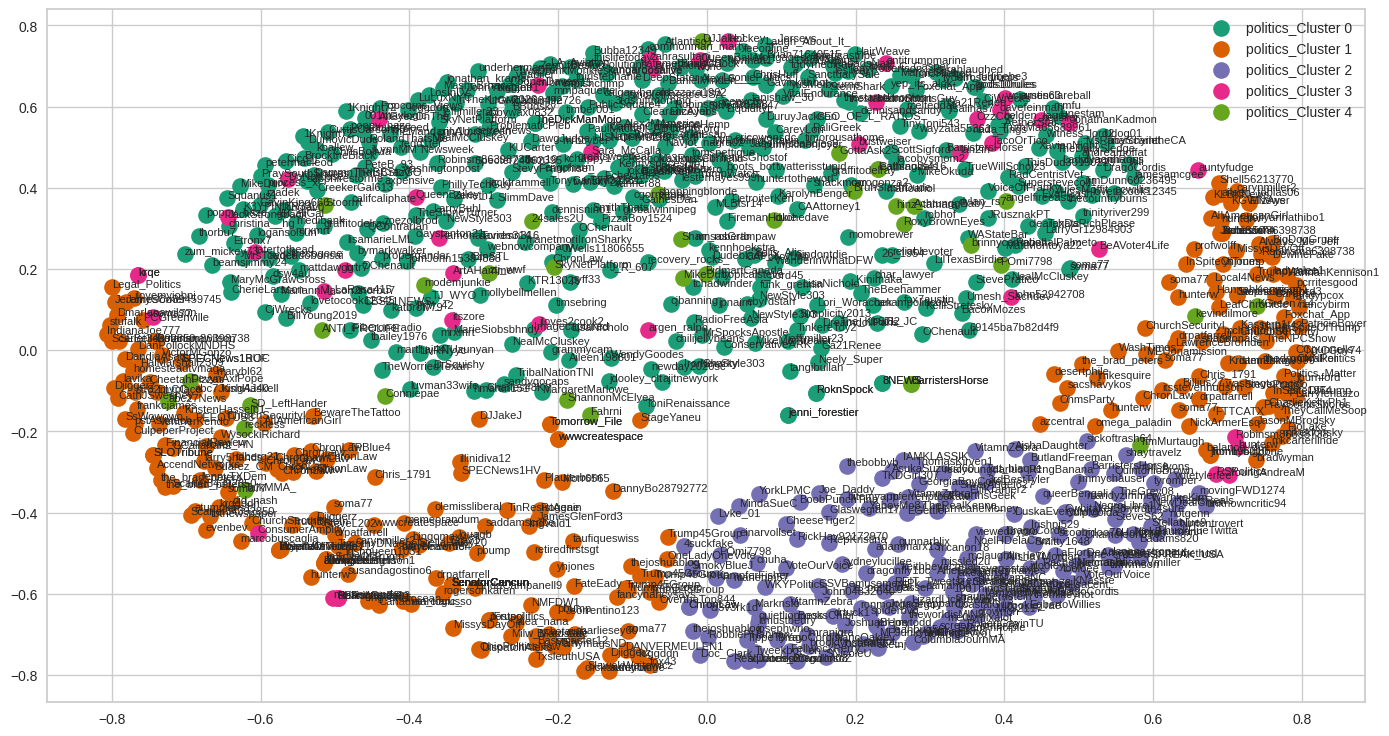

In [ ]:
%matplotlib inline

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=userid_politics.values))

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name], color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',         # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',        # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')

ax.legend(numpoints=1)
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)

plt.show()

# Visualizing the clusters without the usernames

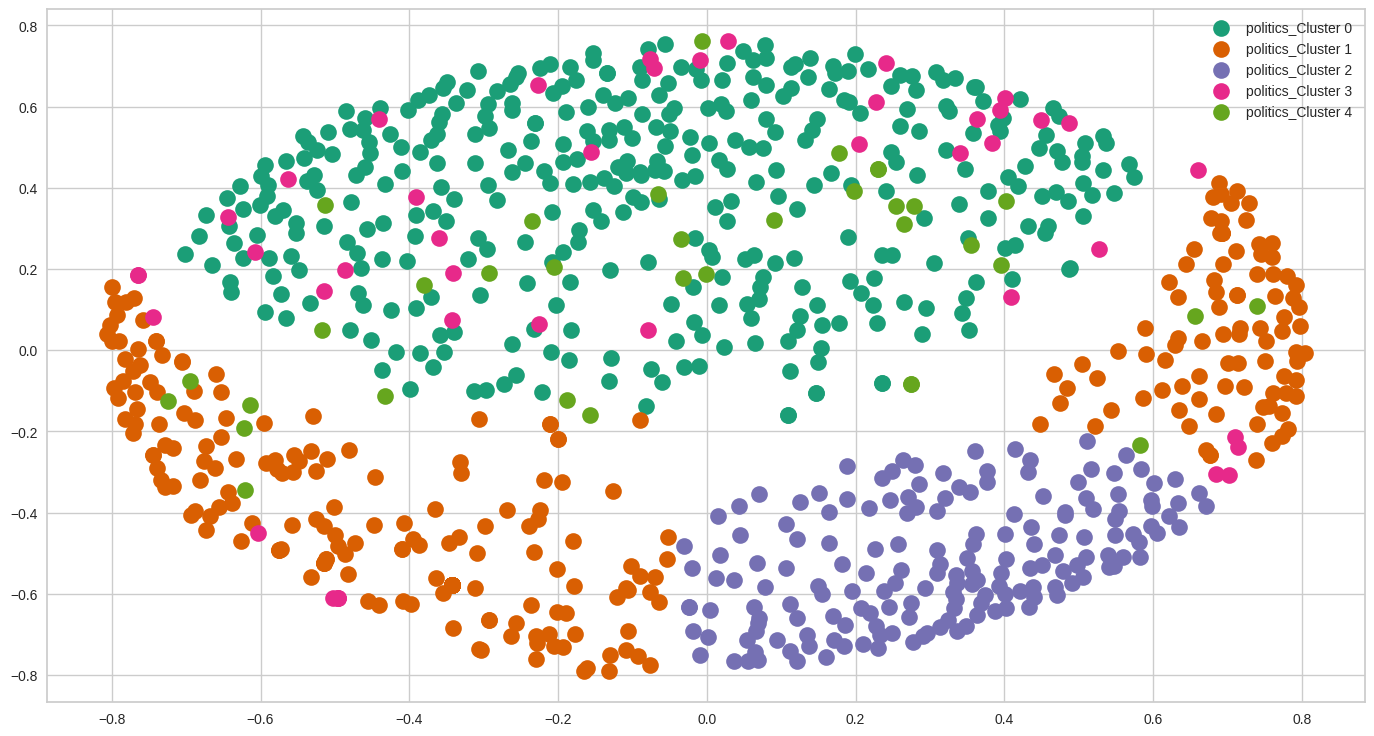

In [ ]:
%matplotlib inline

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=userid_politics.values))

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name], color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',         # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',        # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')

ax.legend(numpoints=1)
plt.show()

In [ ]:
data['cluster'] = clusters

In [ ]:
data.head()

,user,location,tweet,tokenized_sents,cluster
0,Dmarlanawilson,KANSAS,biden admin admit leave hundreds citizens afgh...,"[biden, admin, admit, leave, hundreds, citizen...",1
1,RepKristina,"Green Bay, WI",hope mentorship leaders provide critical insti...,"[hope, mentorship, leaders, provide, critical,...",2
2,rogersonkaren,USA,listen cheney read texts trump jr hannity ingr...,"[listen, cheney, read, texts, trump, jr, hanni...",1
3,le_petit_trek,"Vulcan, Alberta",dumbest thing read canadian politics well,"[dumbest, thing, read, canadian, politics, well]",2
4,Plauterborn,"San Francisco, CA",people conservative hit personally shock,"[people, conservative, hit, personally, shock]",1


In [ ]:
data_politics = data.copy()

In [ ]:
data_politics.head()

,user,location,tweet,tokenized_sents,cluster
0,Dmarlanawilson,KANSAS,biden admin admit leave hundreds citizens afgh...,"[biden, admin, admit, leave, hundreds, citizen...",1
1,RepKristina,"Green Bay, WI",hope mentorship leaders provide critical insti...,"[hope, mentorship, leaders, provide, critical,...",2
2,rogersonkaren,USA,listen cheney read texts trump jr hannity ingr...,"[listen, cheney, read, texts, trump, jr, hanni...",1
3,le_petit_trek,"Vulcan, Alberta",dumbest thing read canadian politics well,"[dumbest, thing, read, canadian, politics, well]",2
4,Plauterborn,"San Francisco, CA",people conservative hit personally shock,"[people, conservative, hit, personally, shock]",1


In [ ]:
tfidf_todense = tfidf_matrix.todense()

In [ ]:
tfidf_todense

matrix([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.2773501, 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]])

# PHASE 2 : SENTIMENT ANALYSIS

# Performing NRC Lexicon for Each Clusters in Politics Community

For Politics Cluster 1

In [ ]:
tfidf_dict_politicsc1 = {}
for token in store_politics_clusters[0]:
    if token not in tfidf_dict_politicsc1:
        if token in feature_names:
            tfidf_dict_politicsc1[token] = np.max(tfidf_todense[:,np.where(feature_names == token)])

In [ ]:
processed_score = {}
for i in range(len(store_politics_clusters[0])):
    processed_score[i] = 0
    try:
        processed_score[i] += tfidf_dict_politicsc1[store_politics_clusters[0][i].lower()]
    except:
        continue

In [ ]:
top_tweets= [(k, l) for k,l in sorted(processed_score.items(), key= lambda x: x[1], reverse=True)]


## Main code snippet for NRC Lexicon

In [ ]:
data_emotion = open("/content/sample_data/NRC-Lexicon.txt")
next(data_emotion)
emotion_lexicon = {}
for line in data_emotion:
    word, emotion, score = line.strip().split("\t")
    if word in emotion_lexicon:
        emotion_lexicon[word].update({emotion: float(score)})
    else:
        emotion_lexicon.update({word: {emotion:float(score)}})

## Here, we try to process all the words in the tweets and give the score related to NRC Lexicon to each tweet and try to gain the emotion related to each tweet

In [ ]:
emotions = list(emotion_lexicon['kill'].keys())

# computing emotional scores for tweets
# top tweets index and score = top_tweets
# Non Normalized here
res_list = [0]*len(emotions)
top_tweets_el = []
#top_tweets_ad = []
#top_tweets_dv = []()
for tweet in top_tweets:
    emotion_score = [0]*len(emotions)
    index = tweet[0]
    clean_tweet = store_politics_clusters[0][index]
    #print("tweet: ",clean_tweet)
    for each_word in clean_tweet.split():
        if each_word in emotion_lexicon:
            temp = []
            for each_emotion in emotion_lexicon[each_word]:
                temp.append(emotion_lexicon[each_word][each_emotion])
            emotion_score = [temp[i] + emotion_score[i] for i in range(len(emotions))]
    top_tweets_el.append(emotion_score)
    res_list = [emotion_score[i] + res_list[i] for i in range(len(emotions))]

### Result list comprises of the whole emotion scores related to 10 different emotions in NRC Lexicon

In [ ]:
res_list

[24.0, 26.0, 15.0, 28.0, 21.0, 44.0, 59.0, 20.0, 18.0, 34.0]

## From here, we perform the same set of steps for all the 5 clusters

For Politics Cluster 2

In [ ]:
tfidf_dict_politicsc2 = {}
for token in store_politics_clusters[1]:
    if token not in tfidf_dict_politicsc2:
        if token in feature_names:
            tfidf_dict_politicsc2[token] = np.max(tfidf_todense[:,np.where(feature_names ==token)])

In [ ]:
processed_score2 = {}
for i in range(len(store_politics_clusters[1])):
    processed_score2[i] = 0
    try:
        processed_score2[i] += tfidf_dict_politicsc2[store_politics_clusters[1][i].lower()]
    except:
        continue

In [ ]:
top_tweets2= [(k, l) for k,l in sorted(processed_score2.items(), key= lambda x: x[1], reverse=True)]


In [ ]:
data_emotion = open("/content/sample_data/NRC-Lexicon.txt")
next(data_emotion)
emotion_lexicon = {}
for line in data_emotion:
    word, emotion, score = line.strip().split("\t")
    if word in emotion_lexicon:
        emotion_lexicon[word].update({emotion: float(score)})
    else:
        emotion_lexicon.update({word: {emotion:float(score)}})

In [ ]:
emotions = list(emotion_lexicon['kill'].keys())

# computing emotional scores for tweets
# top tweets index and score = top_tweets
# Non Normalized here
res_list2 = [0]*len(emotions)
top_tweets_el = []
#top_tweets_ad = []
#top_tweets_dv = []()
for tweet in top_tweets2:
    emotion_score = [0]*len(emotions)
    index = tweet[0]
    clean_tweet2 = store_politics_clusters[1][index]
    #print("tweet: ",clean_tweet)
    for each_word in clean_tweet2.split():
        if each_word in emotion_lexicon:
            temp = []
            for each_emotion in emotion_lexicon[each_word]:
                temp.append(emotion_lexicon[each_word][each_emotion])
            emotion_score = [temp[i] + emotion_score[i] for i in range(len(emotions))]
    top_tweets_el.append(emotion_score)
    res_list2 = [emotion_score[i] + res_list2[i] for i in range(len(emotions))]

In [ ]:
res_list2

[22.0, 23.0, 8.0, 29.0, 17.0, 41.0, 47.0, 19.0, 11.0, 29.0]

For Politics Cluster 3

In [ ]:
tfidf_dict_politicsc3 = {}
for token in store_politics_clusters[2]:
    if token not in tfidf_dict_politicsc3:
        if token in feature_names:
            tfidf_dict_politicsc3[token] = np.max(tfidf_todense[:,np.where(feature_names ==token)])

In [ ]:
processed_score3 = {}
for i in range(len(store_politics_clusters[2])):
    processed_score3[i] = 0
    try:
        processed_score3[i] += tfidf_dict_politicsc3[store_politics_clusters[2][i].lower()]
    except:
        continue

In [ ]:
top_tweets3= [(k, l) for k,l in sorted(processed_score3.items(), key= lambda x: x[1], reverse=True)]


In [ ]:
data_emotion = open("/content/sample_data/NRC-Lexicon.txt")
next(data_emotion)
emotion_lexicon = {}
for line in data_emotion:
    word, emotion, score = line.strip().split("\t")
    if word in emotion_lexicon:
        emotion_lexicon[word].update({emotion: float(score)})
    else:
        emotion_lexicon.update({word: {emotion:float(score)}})

In [ ]:
emotions = list(emotion_lexicon['kill'].keys())

# computing emotional scores for tweets
# top tweets index and score = top_tweets
# Non Normalized here
res_list3 = [0]*len(emotions)
top_tweets_el = []
#top_tweets_ad = []
#top_tweets_dv = []()
for tweet in top_tweets3:
    emotion_score = [0]*len(emotions)
    index = tweet[0]
    clean_tweet3 = store_politics_clusters[2][index]
    #print("tweet: ",clean_tweet)
    for each_word in clean_tweet3.split():
        if each_word in emotion_lexicon:
            temp = []
            for each_emotion in emotion_lexicon[each_word]:
                temp.append(emotion_lexicon[each_word][each_emotion])
            emotion_score = [temp[i] + emotion_score[i] for i in range(len(emotions))]
    top_tweets_el.append(emotion_score)
    res_list3 = [emotion_score[i] + res_list3[i] for i in range(len(emotions))]

In [ ]:
res_list3

[18.0, 16.0, 14.0, 22.0, 13.0, 46.0, 50.0, 18.0, 13.0, 31.0]

For Politics Cluster 4

In [ ]:
tfidf_dict_politicsc4 = {}
for token in store_politics_clusters[3]:
    if token not in tfidf_dict_politicsc4:
        if token in feature_names:
            tfidf_dict_politicsc4[token] = np.max(tfidf_todense[:,np.where(feature_names ==token)])

In [ ]:
processed_score4 = {}
for i in range(len(store_politics_clusters[3])):
    processed_score4[i] = 0
    try:
        processed_score4[i] += tfidf_dict_politicsc4[store_politics_clusters[3][i].lower()]
    except:
        continue

In [ ]:
top_tweets4= [(k, l) for k,l in sorted(processed_score4.items(), key= lambda x: x[1], reverse=True)]


In [ ]:
data_emotion = open("/content/sample_data/NRC-Lexicon.txt")
next(data_emotion)
emotion_lexicon = {}
for line in data_emotion:
    word, emotion, score = line.strip().split("\t")
    if word in emotion_lexicon:
        emotion_lexicon[word].update({emotion: float(score)})
    else:
        emotion_lexicon.update({word: {emotion:float(score)}})

In [ ]:
emotions = list(emotion_lexicon['kill'].keys())

# computing emotional scores for tweets
# top tweets index and score = top_tweets
# Non Normalized here
res_list4 = [0]*len(emotions)
top_tweets_el = []
#top_tweets_ad = []
#top_tweets_dv = []()
for tweet in top_tweets4:
    emotion_score = [0]*len(emotions)
    index = tweet[0]
    clean_tweet4 = store_politics_clusters[3][index]
    #print("tweet: ",clean_tweet)
    for each_word in clean_tweet4.split():
        if each_word in emotion_lexicon:
            temp = []
            for each_emotion in emotion_lexicon[each_word]:
                temp.append(emotion_lexicon[each_word][each_emotion])
            emotion_score = [temp[i] + emotion_score[i] for i in range(len(emotions))]
    top_tweets_el.append(emotion_score)
    res_list4 = [emotion_score[i] + res_list4[i] for i in range(len(emotions))]

In [ ]:
res_list4

[14.0, 24.0, 8.0, 27.0, 11.0, 32.0, 48.0, 9.0, 8.0, 33.0]

For Politics Cluster 5

In [ ]:
tfidf_dict_politicsc5 = {}
for token in store_politics_clusters[4]:
    if token not in tfidf_dict_politicsc5:
        if token in feature_names:
            tfidf_dict_politicsc5[token] = np.max(tfidf_todense[:,np.where(feature_names ==token)])

In [ ]:
processed_score5 = {}
for i in range(len(store_politics_clusters[4])):
    processed_score5[i] = 0
    try:
        processed_score5[i] += tfidf_dict_politicsc5[store_politics_clusters[4][i].lower()]
    except:
        continue

In [ ]:
top_tweets5= [(k, l) for k,l in sorted(processed_score5.items(), key= lambda x: x[1], reverse=True)]


In [ ]:
data_emotion = open("/content/sample_data/NRC-Lexicon.txt")
#data_emotion = open("NRC-Lexicon.txt")

next(data_emotion)
emotion_lexicon = {}
for line in data_emotion:
    word, emotion, score = line.strip().split("\t")
    if word in emotion_lexicon:
        emotion_lexicon[word].update({emotion: float(score)})
    else:
        emotion_lexicon.update({word: {emotion:float(score)}})

In [ ]:
emotions = list(emotion_lexicon['kill'].keys())

# computing emotional scores for tweets
# top tweets index and score = top_tweets
# Non Normalized here
res_list5 = [0]*len(emotions)
top_tweets_el = []
#top_tweets_ad = []
#top_tweets_dv = []()
for tweet in top_tweets5:
    emotion_score = [0]*len(emotions)
    index = tweet[0]
    clean_tweet5 = store_politics_clusters[4][index]
    #print("tweet: ",clean_tweet)
    for each_word in clean_tweet5.split():
        if each_word in emotion_lexicon:
            temp = []
            for each_emotion in emotion_lexicon[each_word]:
                temp.append(emotion_lexicon[each_word][each_emotion])
            emotion_score = [temp[i] + emotion_score[i] for i in range(len(emotions))]
    top_tweets_el.append(emotion_score)
    res_list5 = [emotion_score[i] + res_list5[i] for i in range(len(emotions))]

In [ ]:
res_list5

[14.0, 22.0, 7.0, 25.0, 12.0, 33.0, 40.0, 9.0, 8.0, 32.0]

# Using the resulting emotions above we plot the same for decoding and analyzing the emotions for all the clus

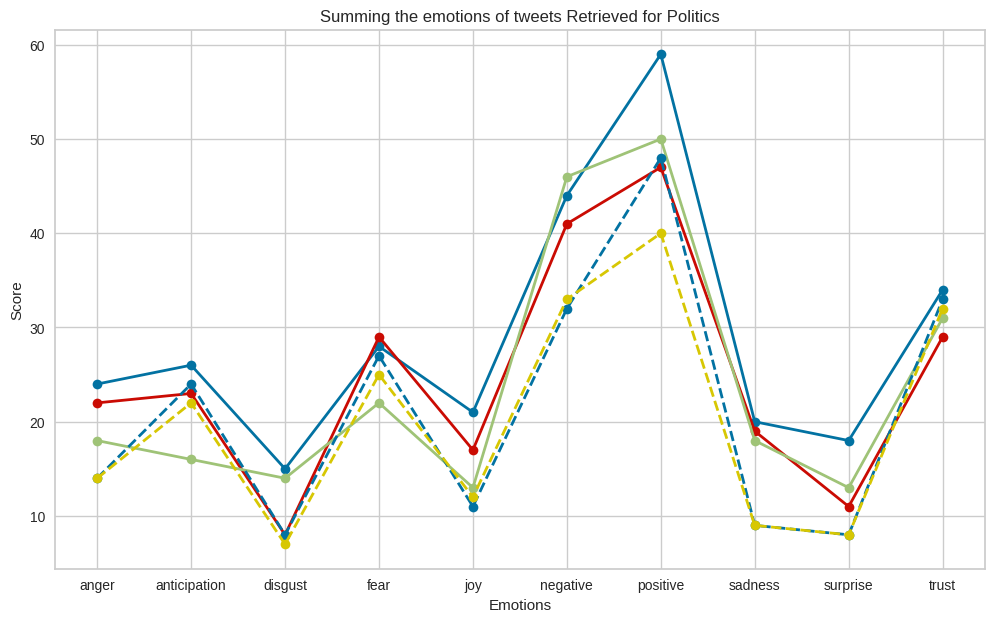

In [ ]:
from matplotlib import cm
# Bar plot of overall emotions of the tweets:
# for each tweet we have added the emotion score ---- NOT NORMALIZED
# then summed all emotions over all tweets:
viridis = cm.get_cmap('viridis',10)
#print(viridis)
plt.figure(figsize=(12,7))

plt.title("Summing the emotions of tweets Retrieved for Politics")
plt.xlabel("Emotions")
plt.ylabel("Score")
plt.plot(emotions,res_list,'bo-',label="Cluster1",linewidth=2)
plt.plot(emotions,res_list2,'ro-',label="Cluster2",linewidth=2)
plt.plot(emotions,res_list3,'go-',label="Cluster3",linewidth=2)
plt.plot(emotions,res_list4,'bo--',label="Cluster4",linewidth=2)
plt.plot(emotions,res_list5,'yo--',label="Cluster5",linewidth=2)

plt.show()

# Performing NRC VAD Lexicon for Each Clusters in Technology Community

### Loading the file in

In [ ]:
# Sentimental analysis using Valance Arousal and Dominace Data

# loading the file into a dictionary
data_lexicon = open("/content/sample_data/NRC-VAD-Lexicon.txt")
next(data_lexicon)
vad = {}
for line in data_lexicon:
    word, var, aro, dom = line.strip().split("\t")
    vad[word] = [float(var),float(aro),float(dom)]


#### For cluster 1

### Visualizing the VAD GRAPHS for each tweets by correlating the scores from the lexicon dictionary to the keywords in the tweets

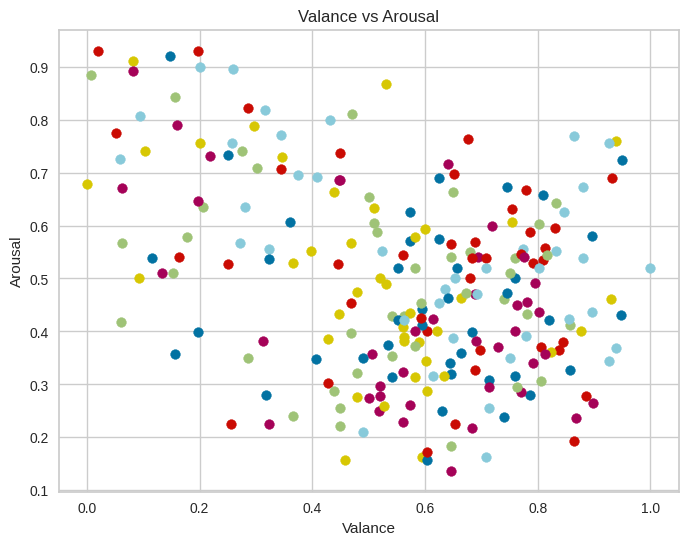

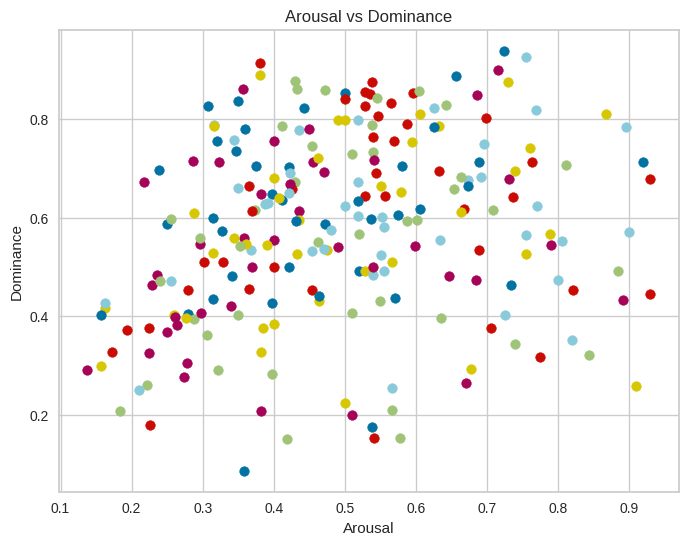

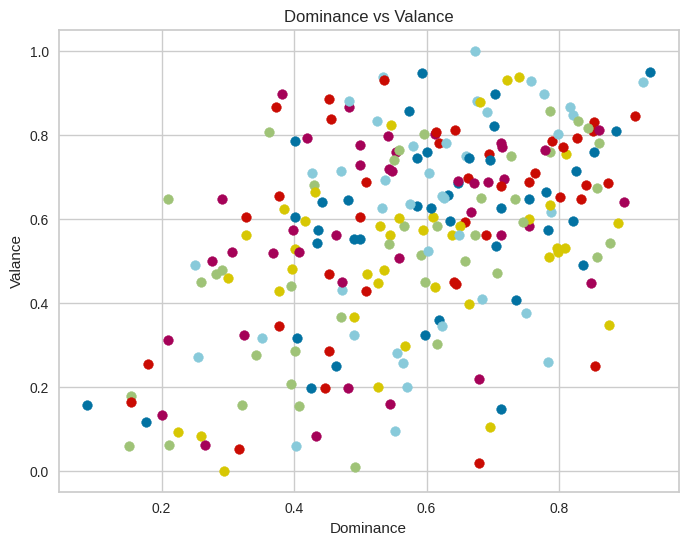

In [ ]:
# calculating the valance arousal and dominance scores
# top tweets index and score = top_tweets
top_tweets_va1 = []
top_tweets_ad1 = []
top_tweets_dv1 = []
for tweet in top_tweets:
    index = tweet[0]
    clean_tweet1 = store_politics_clusters[0][index]
    #print("tweet: ",clean_tweet)
    count = 0
    val_score1 = 0
    arousal_score1 = 0
    dominance_score1 = 0
    for each_word in clean_tweet1.split():
        if each_word in vad:
            val_score1 += vad[each_word][0]
            arousal_score1 += vad[each_word][1]
            dominance_score1 += vad[each_word][2]
            count += 1
    # averaging the score over the words in tweets to get appropriate scores for each tweet
    if count!= 0:
        top_tweets_va1.append([val_score1/count, arousal_score1/count])
        top_tweets_ad1.append([arousal_score1/count, dominance_score1/count])
        top_tweets_dv1.append([dominance_score1/count, val_score1/count])

#-----------------------------------------------------------------------------------------------------------
# Valance vs Arousal
plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va1)):
  plt.scatter(top_tweets_va1[i][0], top_tweets_va1[i][1]) # plt.scatter(x,y,color)
plt.title('Valance vs Arousal')
plt.xlabel('Valance')
plt.ylabel('Arousal')
plt.grid(True)
plt.show()

#-----------------------------------------------------------------------------------------------------------
plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va1)):
  plt.scatter(top_tweets_ad1[i][0], top_tweets_ad1[i][1]) # plt.scatter(x,y,color)
plt.title('Arousal vs Dominance')
plt.xlabel('Arousal')
plt.ylabel('Dominance')
plt.grid(True)
plt.show()

#---------------------------------------------------------------------------------------------------------------

plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va1)):
  plt.scatter(top_tweets_dv1[i][0], top_tweets_dv1[i][1]) # plt.scatter(x,y,color)
plt.title('Dominance vs Valance')
plt.xlabel('Dominance')
plt.ylabel('Valance')
plt.grid(True)
plt.show()

### We perform the same set of steps henceforth for all the 5 clusters

#### For Cluster 2

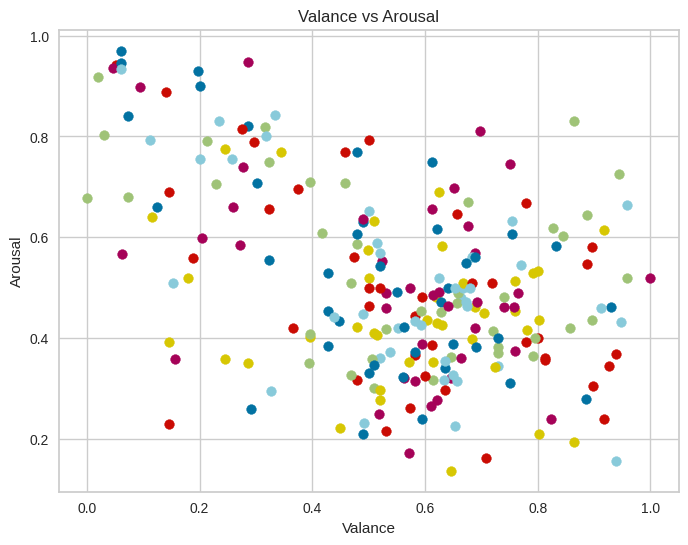

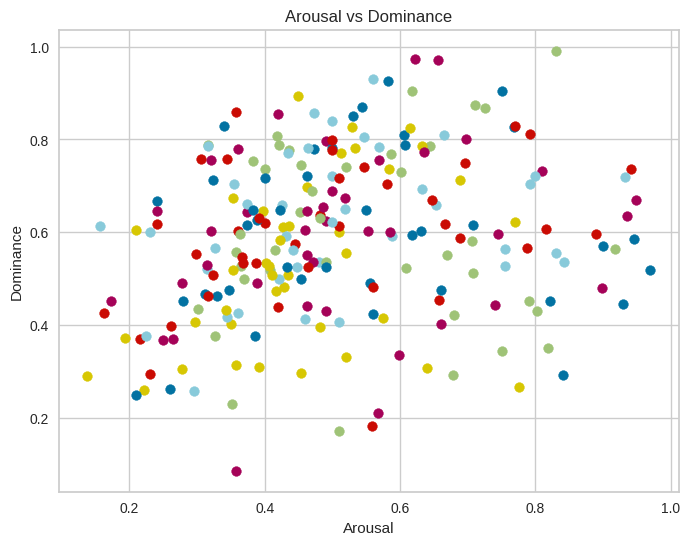

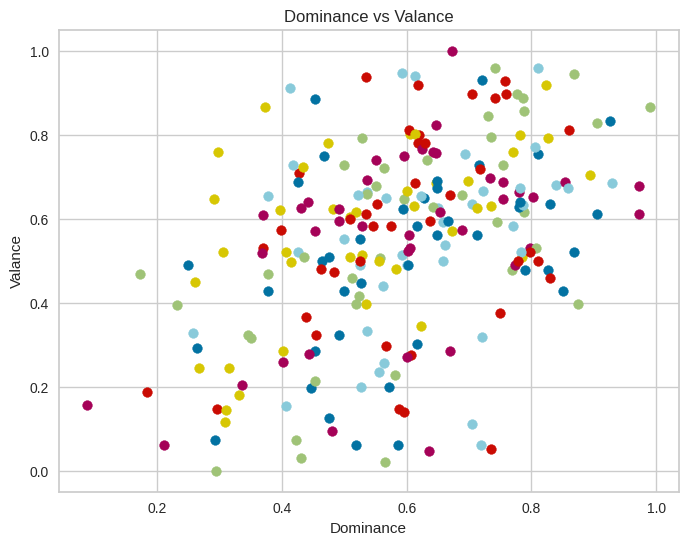

In [ ]:
# calculating the valance arousal and dominance scores
# top tweets index and score = top_tweets
top_tweets_va2 = []
top_tweets_ad2 = []
top_tweets_dv2 = []
for tweet in top_tweets2:
    index = tweet[0]
    clean_tweet2 = store_politics_clusters[1][index]
    #print("tweet: ",clean_tweet)
    count = 0
    val_score2 = 0
    arousal_score2 = 0
    dominance_score2 = 0
    for each_word in clean_tweet2.split():
        if each_word in vad:
            val_score2 += vad[each_word][0]
            arousal_score2 += vad[each_word][1]
            dominance_score2 += vad[each_word][2]
            count += 1
    # averaging the score over the words in tweets to get appropriate scores for each tweet
    if count!= 0:
        top_tweets_va2.append([val_score2/count, arousal_score2/count])
        top_tweets_ad2.append([arousal_score2/count, dominance_score2/count])
        top_tweets_dv2.append([dominance_score2/count, val_score2/count])

#-----------------------------------------------------------------------------------------------------------
# Valance vs Arousal
plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va2)):
  plt.scatter(top_tweets_va2[i][0], top_tweets_va2[i][1]) # plt.scatter(x,y,color)
plt.title('Valance vs Arousal')
plt.xlabel('Valance')
plt.ylabel('Arousal')
plt.grid(True)
plt.show()

#-----------------------------------------------------------------------------------------------------------
plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va2)):
  plt.scatter(top_tweets_ad2[i][0], top_tweets_ad2[i][1]) # plt.scatter(x,y,color)
plt.title('Arousal vs Dominance')
plt.xlabel('Arousal')
plt.ylabel('Dominance')
plt.grid(True)
plt.show()

#---------------------------------------------------------------------------------------------------------------

plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va2)):
  plt.scatter(top_tweets_dv2[i][0], top_tweets_dv2[i][1]) # plt.scatter(x,y,color)
plt.title('Dominance vs Valance')
plt.xlabel('Dominance')
plt.ylabel('Valance')
plt.grid(True)
plt.show()

#### For cluster 3

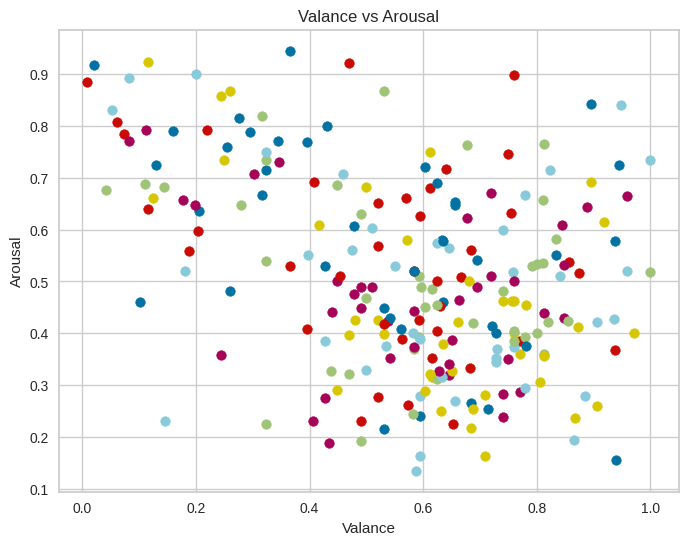

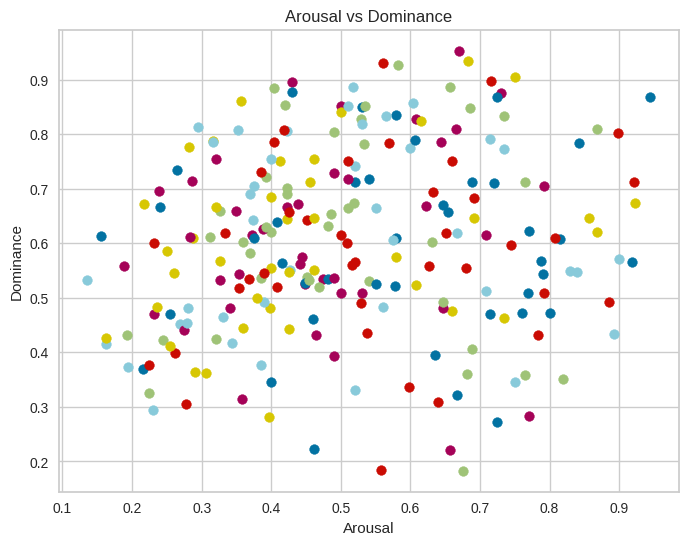

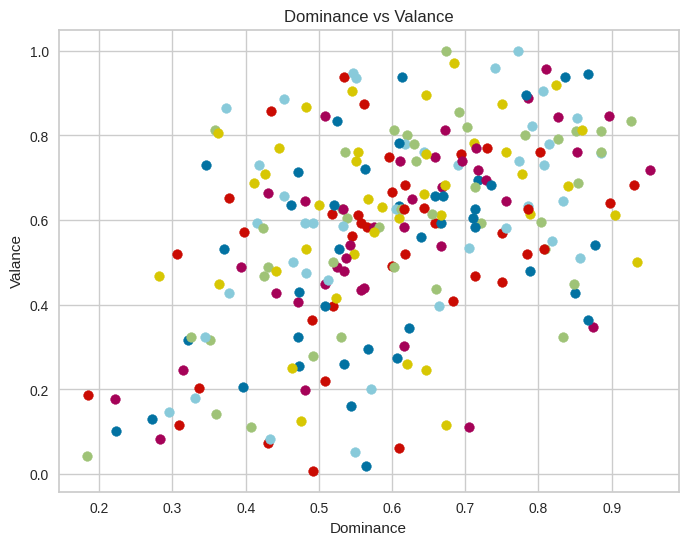

In [ ]:
# calculating the valance arousal and dominance scores
# top tweets index and score = top_tweets
top_tweets_va3 = []
top_tweets_ad3 = []
top_tweets_dv3 = []
for tweet in top_tweets3:
    index = tweet[0]
    clean_tweet3 = store_politics_clusters[2][index]
    #print("tweet: ",clean_tweet)
    count = 0
    val_score3 = 0
    arousal_score3 = 0
    dominance_score3 = 0
    for each_word in clean_tweet3.split():
        if each_word in vad:
            val_score3 += vad[each_word][0]
            arousal_score3 += vad[each_word][1]
            dominance_score3 += vad[each_word][2]
            count += 1
    # averaging the score over the words in tweets to get appropriate scores for each tweet
    if count!= 0:
        top_tweets_va3.append([val_score3/count, arousal_score3/count])
        top_tweets_ad3.append([arousal_score3/count, dominance_score3/count])
        top_tweets_dv3.append([dominance_score3/count, val_score3/count])

#-----------------------------------------------------------------------------------------------------------
# Valance vs Arousal
plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va3)):
  plt.scatter(top_tweets_va3[i][0], top_tweets_va3[i][1]) # plt.scatter(x,y,color)
plt.title('Valance vs Arousal')
plt.xlabel('Valance')
plt.ylabel('Arousal')
plt.grid(True)
plt.show()

#-----------------------------------------------------------------------------------------------------------
plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va3)):
  plt.scatter(top_tweets_ad3[i][0], top_tweets_ad3[i][1]) # plt.scatter(x,y,color)
plt.title('Arousal vs Dominance')
plt.xlabel('Arousal')
plt.ylabel('Dominance')
plt.grid(True)
plt.show()

#---------------------------------------------------------------------------------------------------------------

plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va3)):
  plt.scatter(top_tweets_dv3[i][0], top_tweets_dv3[i][1]) # plt.scatter(x,y,color)
plt.title('Dominance vs Valance')
plt.xlabel('Dominance')
plt.ylabel('Valance')
plt.grid(True)
plt.show()

#### For cluster 4

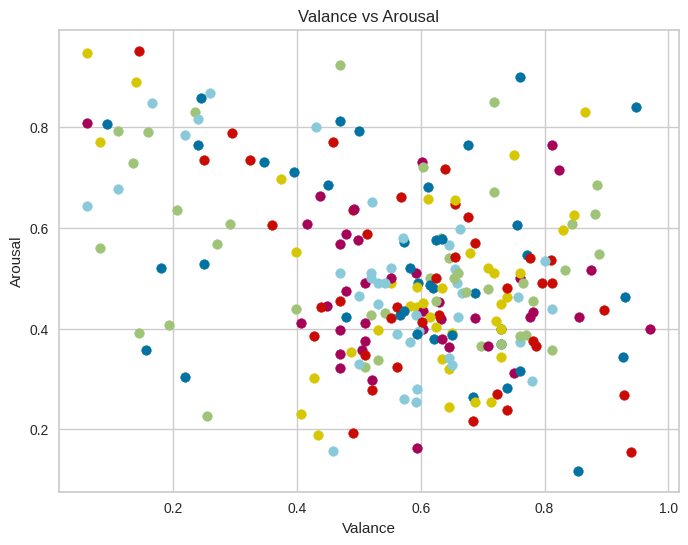

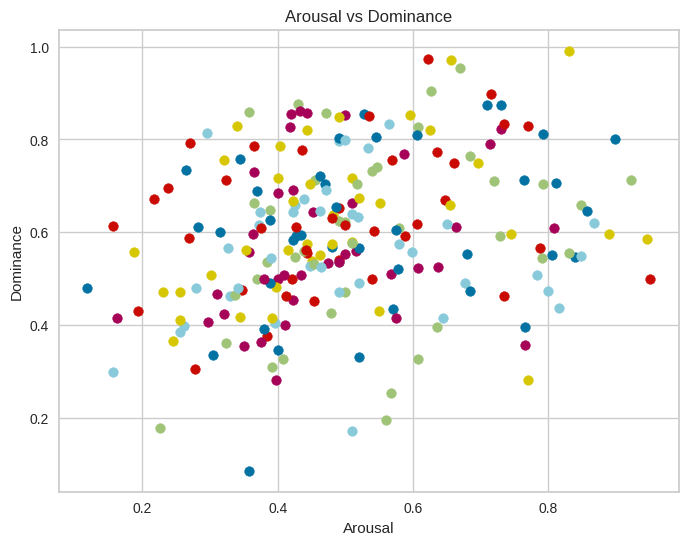

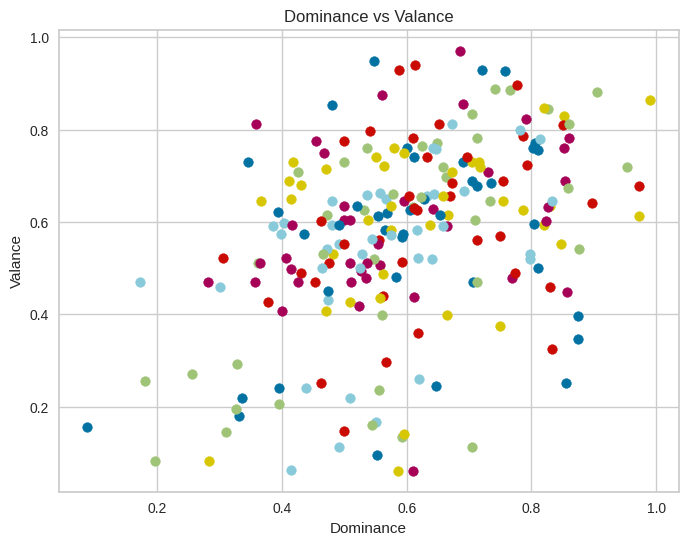

In [ ]:
# calculating the valance arousal and dominance scores
# top tweets index and score = top_tweets
top_tweets_va4 = []
top_tweets_ad4 = []
top_tweets_dv4 = []
for tweet in top_tweets4:
    index = tweet[0]
    clean_tweet4 = store_politics_clusters[3][index]
    #print("tweet: ",clean_tweet)
    count = 0
    val_score4 = 0
    arousal_score4 = 0
    dominance_score4 = 0
    for each_word in clean_tweet4.split():
        if each_word in vad:
            val_score4 += vad[each_word][0]
            arousal_score4 += vad[each_word][1]
            dominance_score4 += vad[each_word][2]
            count += 1
    # averaging the score over the words in tweets to get appropriate scores for each tweet
    if count!= 0:
        top_tweets_va4.append([val_score4/count, arousal_score4/count])
        top_tweets_ad4.append([arousal_score4/count, dominance_score4/count])
        top_tweets_dv4.append([dominance_score4/count, val_score4/count])

#-----------------------------------------------------------------------------------------------------------
# Valance vs Arousal
plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va4)):
  plt.scatter(top_tweets_va4[i][0], top_tweets_va4[i][1]) # plt.scatter(x,y,color)
plt.title('Valance vs Arousal')
plt.xlabel('Valance')
plt.ylabel('Arousal')
plt.grid(True)
plt.show()

#-----------------------------------------------------------------------------------------------------------
plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va4)):
  plt.scatter(top_tweets_ad4[i][0], top_tweets_ad4[i][1]) # plt.scatter(x,y,color)
plt.title('Arousal vs Dominance')
plt.xlabel('Arousal')
plt.ylabel('Dominance')
plt.grid(True)
plt.show()

#---------------------------------------------------------------------------------------------------------------

plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va4)):
  plt.scatter(top_tweets_dv4[i][0], top_tweets_dv4[i][1]) # plt.scatter(x,y,color)
plt.title('Dominance vs Valance')
plt.xlabel('Dominance')
plt.ylabel('Valance')
plt.grid(True)
plt.show()

#### For cluster 5

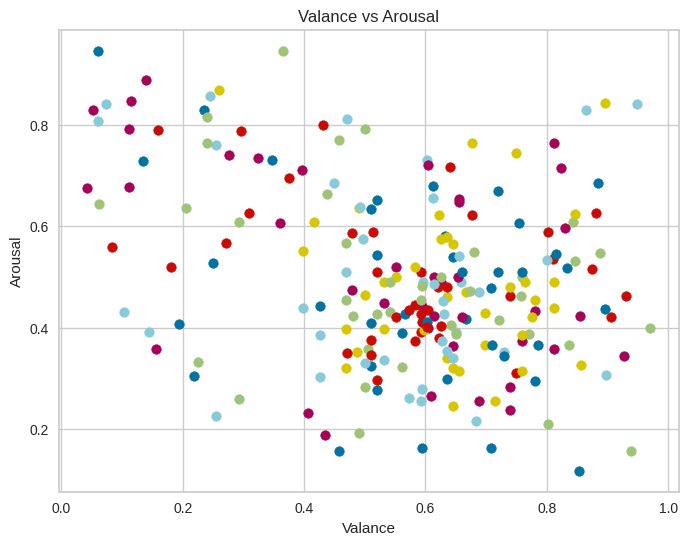

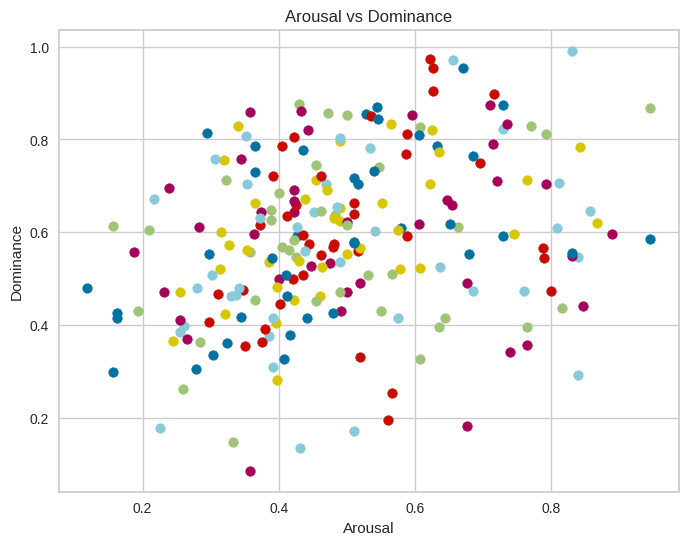

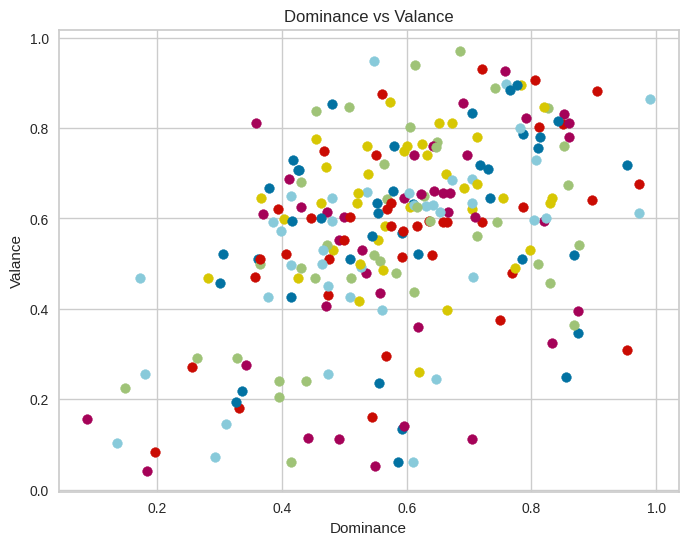

In [ ]:
# calculating the valance arousal and dominance scores
# top tweets index and score = top_tweets
top_tweets_va5 = []
top_tweets_ad5 = []
top_tweets_dv5 = []
for tweet in top_tweets5:
    index = tweet[0]
    clean_tweet5 = store_politics_clusters[4][index]
    #print("tweet: ",clean_tweet)
    count = 0
    val_score5 = 0
    arousal_score5 = 0
    dominance_score5 = 0
    for each_word in clean_tweet5.split():
        if each_word in vad:
            val_score5 += vad[each_word][0]
            arousal_score5 += vad[each_word][1]
            dominance_score5 += vad[each_word][2]
            count += 1
    # averaging the score over the words in tweets to get appropriate scores for each tweet
    if count!= 0:
        top_tweets_va5.append([val_score5/count, arousal_score5/count])
        top_tweets_ad5.append([arousal_score5/count, dominance_score5/count])
        top_tweets_dv5.append([dominance_score5/count, val_score5/count])

#-----------------------------------------------------------------------------------------------------------
# Valance vs Arousal
plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va5)):
  plt.scatter(top_tweets_va5[i][0], top_tweets_va5[i][1]) # plt.scatter(x,y,color)
plt.title('Valance vs Arousal')
plt.xlabel('Valance')
plt.ylabel('Arousal')
plt.grid(True)
plt.show()

#-----------------------------------------------------------------------------------------------------------
plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va5)):
  plt.scatter(top_tweets_ad5[i][0], top_tweets_ad5[i][1]) # plt.scatter(x,y,color)
plt.title('Arousal vs Dominance')
plt.xlabel('Arousal')
plt.ylabel('Dominance')
plt.grid(True)
plt.show()

#---------------------------------------------------------------------------------------------------------------

plt.figure(figsize=(8,6))
for i in range(len(top_tweets_va5)):
  plt.scatter(top_tweets_dv5[i][0], top_tweets_dv5[i][1]) # plt.scatter(x,y,color)
plt.title('Dominance vs Valance')
plt.xlabel('Dominance')
plt.ylabel('Valance')
plt.grid(True)
plt.show()

# VADER Implementation

In [ ]:
analyzer = SentimentIntensityAnalyzer()
data['vader_scores'] = data['tokenized_sents'].apply(lambda x: [analyzer.polarity_scores(word) for word in x])

### Taking into consideration the agg VADER scores for all the tweets

In [ ]:
def agg_vader_score(data2):
  return sum([data2[i]['compound'] for i in range(len(data2))])/len(data2)
temp =[]
for i in range(len(data)):
  temp.append(agg_vader_score(data['vader_scores'][i]))

In [ ]:
data['agg_vader_score'] = temp

## Setting the mean cluster polarity for the threshold of the tweets to decide the positive and negative tweets

In [ ]:
mean_cluster_polarity = []
for i in range(0,5):
  #print(i, data['agg_vader_score'][(data.cluster == i)].mean())
  mean_cluster_polarity.append(data['agg_vader_score'][(data.cluster == i)].mean())
print(mean_cluster_polarity)

[0.002454700749372469, -0.014455996559703201, 0.01714880871851377, 0.007922589638713458, -0.004441314085565524]


In [ ]:
sentiments_count_cluster = []
datac1 = data['agg_vader_score'][(data.cluster == 0)]
politics_cluster1_list = datac1.values.tolist()

datac2 = data['agg_vader_score'][(data.cluster == 1)]
politics_cluster2_list = datac2.values.tolist()

datac3 = data['agg_vader_score'][(data.cluster == 2)]
politics_cluster3_list = datac3.values.tolist()

datac4 = data['agg_vader_score'][(data.cluster == 3)]
politics_cluster4_list = datac4.values.tolist()

datac5 = data['agg_vader_score'][(data.cluster == 4)]
politics_cluster5_list = datac5.values.tolist()

## Deduction of total overall positive and negative tweets in each cluster and preparing the data for visualization

For Cluster 1

In [ ]:
negative_count = 0
positive_count = 0
for i in range(len(politics_cluster1_list)):
  if politics_cluster1_list[i] < -mean_cluster_polarity[0]:
    negative_count = negative_count + 1
  elif politics_cluster1_list[i] > mean_cluster_polarity[0]:
    positive_count = positive_count + 1
sentiments_count_cluster.append([positive_count, negative_count])
negative_count = 0
positive_count = 0
print(sentiments_count_cluster)

[[172, 150]]


For Cluster 2

In [ ]:
for i in range(len(politics_cluster2_list)):
  if politics_cluster2_list[i] < -mean_cluster_polarity[1]:
    negative_count = negative_count + 1
  elif politics_cluster2_list[i] > mean_cluster_polarity[1]:
    positive_count = positive_count + 1
sentiments_count_cluster.append([positive_count, negative_count])
negative_count = 0
positive_count = 0
print(sentiments_count_cluster)

[[172, 150], [71, 203]]


For Cluster 3

In [ ]:
for i in range(len(politics_cluster3_list)):
  if politics_cluster3_list[i] < -mean_cluster_polarity[2]:
    negative_count = negative_count + 1
  elif politics_cluster3_list[i] > mean_cluster_polarity[2]:
    positive_count = positive_count + 1
sentiments_count_cluster.append([positive_count, negative_count])
negative_count = 0
positive_count = 0
print(sentiments_count_cluster)

[[172, 150], [71, 203], [76, 47]]


For Cluster 4

In [ ]:
for i in range(len(politics_cluster4_list)):
  if politics_cluster4_list[i] < -mean_cluster_polarity[3]:
    negative_count = negative_count + 1
  elif politics_cluster4_list[i] > mean_cluster_polarity[3]:
    positive_count = positive_count + 1
sentiments_count_cluster.append([positive_count, negative_count])
negative_count = 0
positive_count = 0
print(sentiments_count_cluster)

[[172, 150], [71, 203], [76, 47], [19, 8]]


For Cluster 5

In [ ]:
for i in range(len(politics_cluster5_list)):
  if politics_cluster5_list[i] < -mean_cluster_polarity[4]:
    negative_count = negative_count + 1
  elif politics_cluster5_list[i] > mean_cluster_polarity[4]:
    positive_count = positive_count + 1
sentiments_count_cluster.append([positive_count, negative_count])
negative_count = 0
positive_count = 0
print(sentiments_count_cluster)

[[172, 150], [71, 203], [76, 47], [19, 8], [12, 23]]


# Graphical representation of VADER for each of the clusters

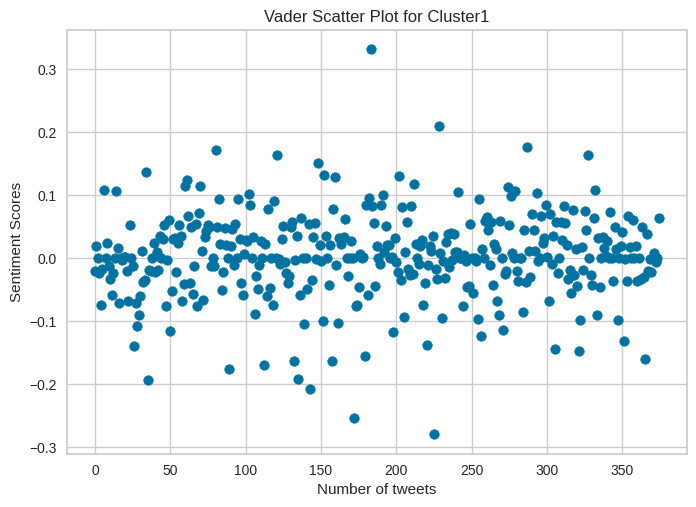

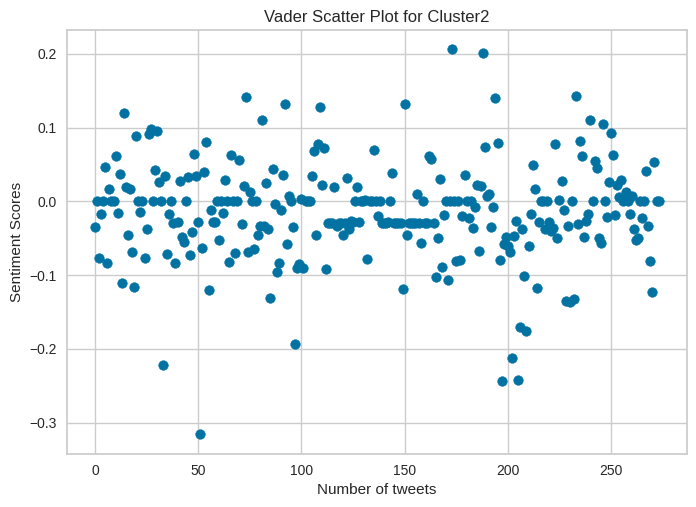

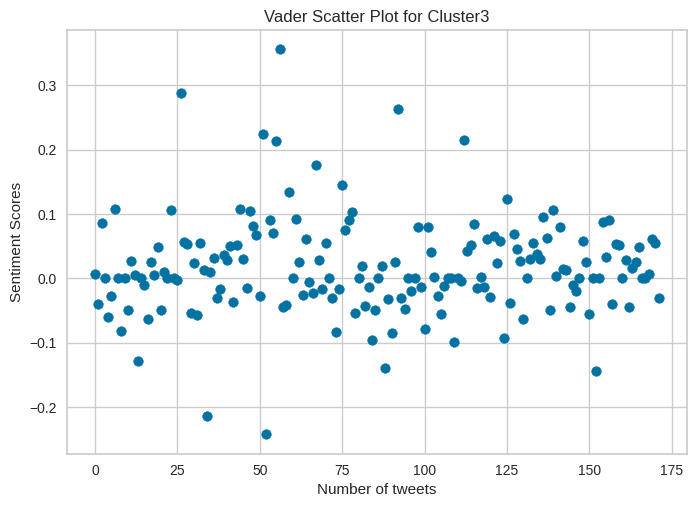

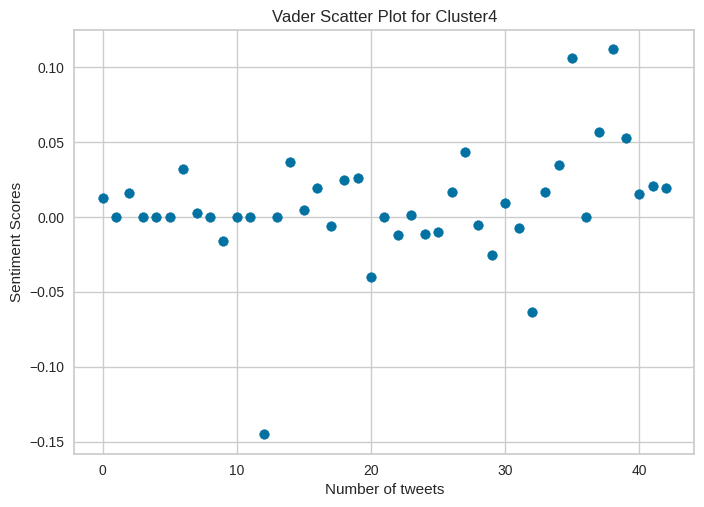

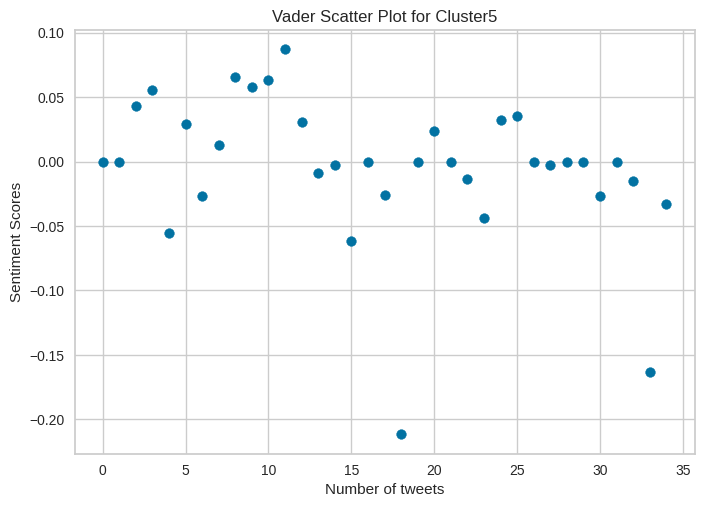

In [ ]:
politics_cluster_list = [politics_cluster1_list,politics_cluster2_list,politics_cluster3_list,politics_cluster4_list, politics_cluster5_list]
i = 1
for subscore in politics_cluster_list:
    x = range(len(subscore))
    plt.scatter(x, subscore)

# Set the x and y axis labels
    plt.xlabel('Number of tweets')
    plt.ylabel('Sentiment Scores')

# Set the title of the plot
    plt.title('Vader Scatter Plot for Cluster' + str(i))
    i+=1

# Show the plot
    plt.show()

# AFINN Implementation

In [ ]:
afinn = Afinn()

data['afinn_scores'] = data['tokenized_sents'].apply(lambda x: [afinn.score(word) for word in x])


In [ ]:
data['afinn_scores']

0      [0.0, 0.0, -1.0, -1.0, 0.0, 0.0, 0.0, -2.0, -3.0]
1      [2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3                         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
4                             [0.0, 0.0, 0.0, 0.0, -2.0]
                             ...                        
894    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
895    [0.0, -1.0, 0.0, 0.0, 0.0, -2.0, 0.0, 0.0, 0.0...
896    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
897    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
898                            [0.0, 0.0, 0.0, 0.0, 0.0]
Name: afinn_scores, Length: 899, dtype: object

### Taking into consideration the agg AFINN scores for all the tweets

In [ ]:
def agg_afinn_score(data2):
  return sum([data2[i] for i in range(len(data2))])/len(data2)

temp = []
for i in range(len(data)):
  temp.append(agg_afinn_score(data['afinn_scores'][i]))

In [ ]:
data['agg_afinn_score'] = temp

## Setting the mean cluster polarity for the threshold of the tweets to decide the positive and negative tweets

In [ ]:
mean_cluster_polarity = []
for i in range(0,5):
  #print(i, data['agg_vader_score'][(data.cluster == i)].mean())
  mean_cluster_polarity.append(data['agg_afinn_score'][(data.cluster == i)].mean())
print(mean_cluster_polarity)

[-0.05984666545232435, -0.08015693480109796, -0.006032328655036805, -0.07756052626903659, -0.054305116722188816]


In [ ]:
sentiments_count_cluster_a = []
datac1_a = data['agg_afinn_score'][(data.cluster == 0)]
politics_cluster1_list_a = datac1_a.values.tolist()

datac2_a = data['agg_afinn_score'][(data.cluster == 1)]
politics_cluster2_list_a = datac2_a.values.tolist()

datac3_a = data['agg_afinn_score'][(data.cluster == 2)]
politics_cluster3_list_a = datac3_a.values.tolist()

datac4_a = data['agg_afinn_score'][(data.cluster == 3)]
politics_cluster4_list_a = datac4_a.values.tolist()

datac5_a = data['agg_afinn_score'][(data.cluster == 4)]
politics_cluster5_list_a = datac5_a.values.tolist()

## Deduction of total overall positive and negative tweets in each cluster and preparing the data for visualization

For Cluster 1

In [ ]:
negative_count = 0
positive_count = 0
for i in range(len(politics_cluster1_list_a)):
  if politics_cluster1_list_a[i] < -mean_cluster_polarity[0]:
    negative_count = negative_count + 1
  elif politics_cluster1_list_a[i] > mean_cluster_polarity[0]:
    positive_count = positive_count + 1
sentiments_count_cluster_a.append([positive_count, negative_count])
negative_count = 0
positive_count = 0
print(sentiments_count_cluster_a)

[[110, 265]]


For Cluster 2

In [ ]:
for i in range(len(politics_cluster2_list_a)):
  if politics_cluster2_list_a[i] < -mean_cluster_polarity[1]:
    negative_count = negative_count + 1
  elif politics_cluster2_list_a[i] > mean_cluster_polarity[1]:
    positive_count = positive_count + 1
sentiments_count_cluster_a.append([positive_count, negative_count])
negative_count = 0
positive_count = 0
print(sentiments_count_cluster_a)

[[110, 265], [62, 212]]


For Cluster 3

In [ ]:
for i in range(len(politics_cluster3_list_a)):
  if politics_cluster3_list_a[i] < -mean_cluster_polarity[2]:
    negative_count = negative_count + 1
  elif politics_cluster3_list_a[i] > mean_cluster_polarity[2]:
    positive_count = positive_count + 1
sentiments_count_cluster_a.append([positive_count, negative_count])
negative_count = 0
positive_count = 0
print(sentiments_count_cluster_a)

[[110, 265], [62, 212], [70, 102]]


For Cluster 4

In [ ]:
for i in range(len(politics_cluster4_list_a)):
  if politics_cluster4_list_a[i] < -mean_cluster_polarity[3]:
    negative_count = negative_count + 1
  elif politics_cluster4_list_a[i] > mean_cluster_polarity[3]:
    positive_count = positive_count + 1
sentiments_count_cluster_a.append([positive_count, negative_count])
negative_count = 0
positive_count = 0
print(sentiments_count_cluster_a)

[[110, 265], [62, 212], [70, 102], [7, 36]]


For Cluster 5

In [ ]:
for i in range(len(politics_cluster5_list_a)):
  if politics_cluster5_list_a[i] < -mean_cluster_polarity[4]:
    negative_count = negative_count + 1
  elif politics_cluster5_list_a[i] > mean_cluster_polarity[4]:
    positive_count = positive_count + 1
sentiments_count_cluster_a.append([positive_count, negative_count])
negative_count = 0
positive_count = 0
print(sentiments_count_cluster_a)

[[110, 265], [62, 212], [70, 102], [7, 36], [9, 26]]


# Graphical representation of AFINN for each of the clusters

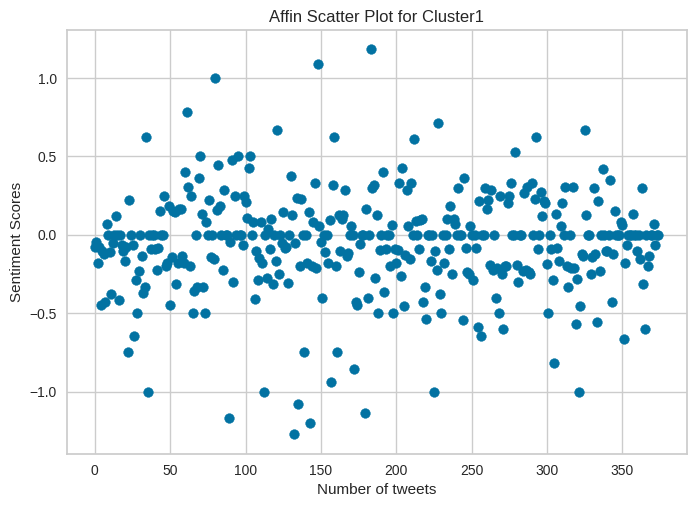

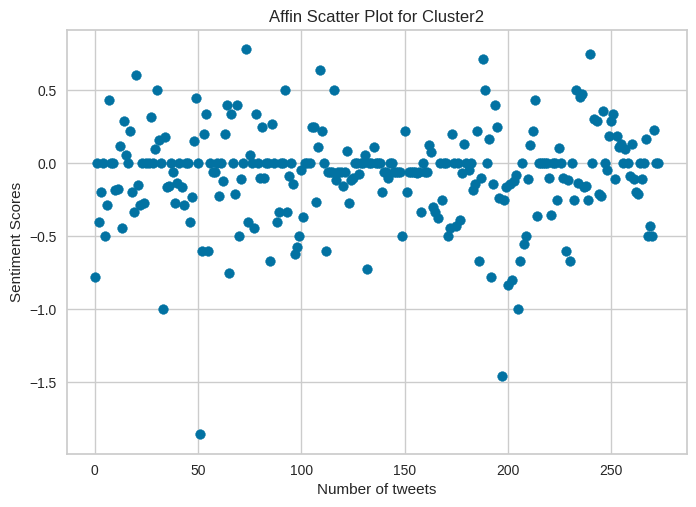

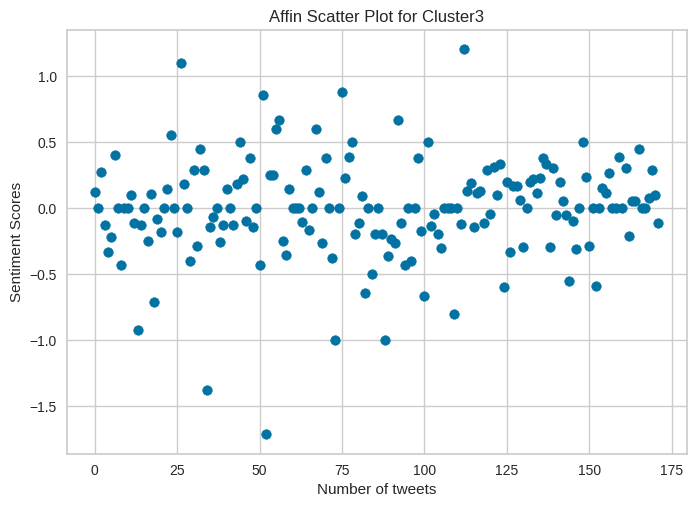

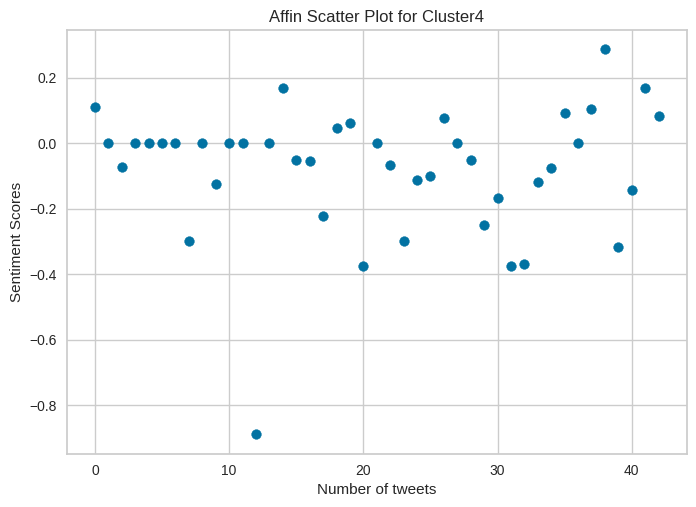

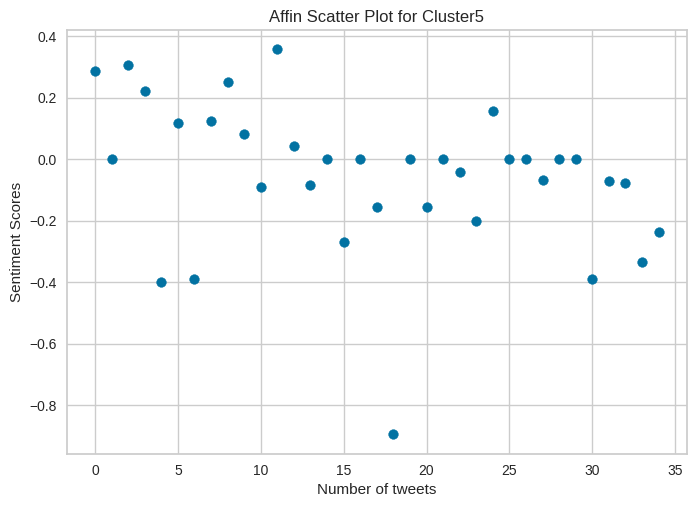

In [ ]:
politics_cluster_list_a = [politics_cluster1_list_a,politics_cluster2_list_a,politics_cluster3_list_a,politics_cluster4_list_a, politics_cluster5_list_a]
i = 1
for subscore in politics_cluster_list_a:
    x = range(len(subscore))
    plt.scatter(x, subscore)

# Set the x and y axis labels
    plt.xlabel('Number of tweets')
    plt.ylabel('Sentiment Scores')

# Set the title of the plot
    plt.title('Affin Scatter Plot for Cluster' + str(i))
    i+=1

# Show the plot
    plt.show()

# ASSESSING SENTIMENT POLARITY AND SUBJECTIVITY POLARITY FOR EACH CLUSTER

In [ ]:
UniqueNames = data['cluster'].unique()
UniqueNames

DataFrameDict = {elem :
pd.DataFrame for elem in UniqueNames}
DataFrameDict

{1: pandas.core.frame.DataFrame,
 2: pandas.core.frame.DataFrame,
 0: pandas.core.frame.DataFrame,
 4: pandas.core.frame.DataFrame,
 3: pandas.core.frame.DataFrame}

In [ ]:
for key in DataFrameDict.keys():
    DataFrameDict[key] = data[:][data.cluster == key]

In [ ]:
polaritycluster={elem : pd.DataFrame for elem in UniqueNames}
subjectivitycluster={elem : pd.DataFrame for elem in UniqueNames}
for i in DataFrameDict.keys():
    polaritycluster[i]=TextBlob(' '.join(DataFrameDict[i]['tweet'].astype('str'))).sentiment.polarity
    subjectivitycluster[i]=TextBlob(' '.join(DataFrameDict[i]['tweet'].astype('str'))).sentiment.subjectivity

### Polarity for all the clusters

In [ ]:
polaritycluster

{1: 0.07165733151528604,
 2: 0.05412515514788241,
 0: 0.030650084807979514,
 4: -0.01376357560568088,
 3: 0.1088274044795784}

### Subjectivity for all the clusters

In [ ]:
subjectivitycluster

{1: 0.4703680830953557,
 2: 0.5398325285825284,
 0: 0.4694668937300525,
 4: 0.5668476747424115,
 3: 0.49227053140096616}

## Visualizing the Polarity graph for all the clusters

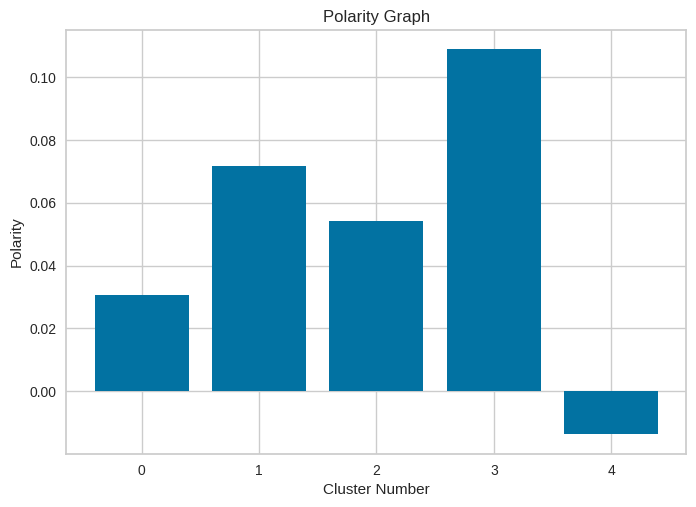

In [ ]:
plt.bar(list(polaritycluster.keys()), list(polaritycluster.values()))

plt.title('Polarity Graph')
plt.xlabel('Cluster Number')
plt.ylabel('Polarity')
plt.show()

## Visualizing the Subjectivity graph for all the clusters

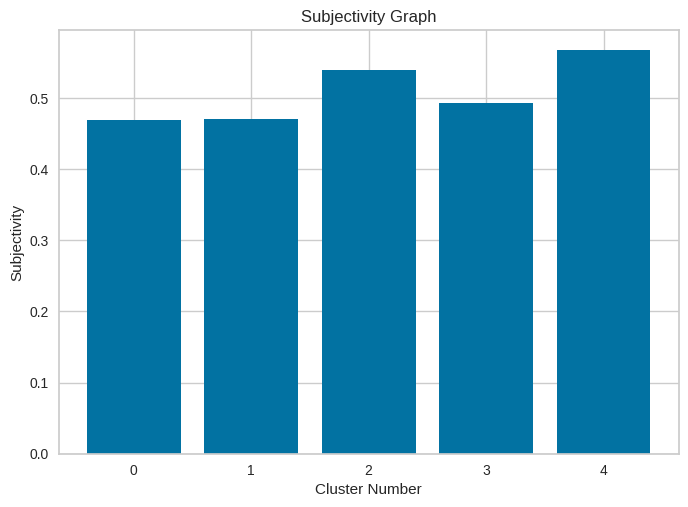

In [ ]:
plt.bar(list(subjectivitycluster.keys()), list(subjectivitycluster.values()))

plt.title('Subjectivity Graph')
plt.xlabel('Cluster Number')
plt.ylabel('Subjectivity')
plt.show()

## Visualizing the Polarity-Subjectivity Graph for all the clusters

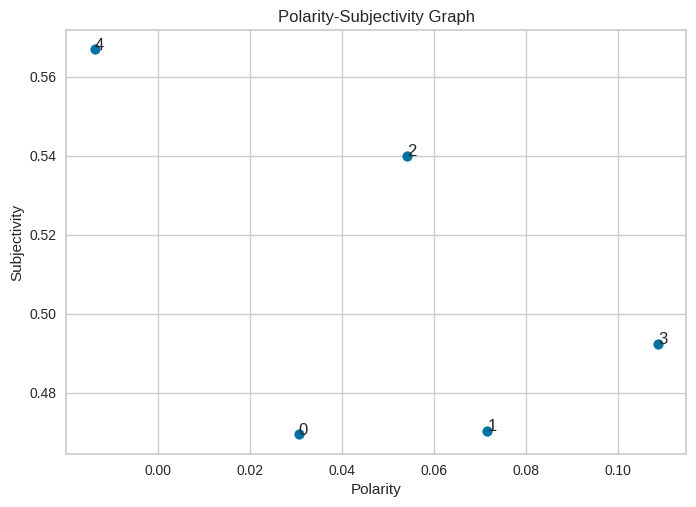

In [ ]:
#plt.scatter(list(polaritycluster.values()), list(subjectivitycluster.values()))

x=list(polaritycluster.values())
y=list(subjectivitycluster.values())

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, label in enumerate(polaritycluster.keys()):
    ax.annotate(label, (x[i], y[i]))

plt.title('Polarity-Subjectivity Graph')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

# PHASE 3 : KEYWORD ANALYSIS

# Word Cloud Analysis

In [ ]:
store_politics_clusters

[['absolutely',
  'accord',
  'achieve',
  'advance',
  'ago',
  'aid',
  'air',
  'american',
  'amount',
  'arizona',
  'assistance',
  'attorney',
  'baby',
  'bed',
  'better',
  'bidenflation',
  'bitch',
  'black',
  'blind',
  'block',
  'bloomberg',
  'blue',
  'brainwash',
  'brother',
  'build',
  'bully',
  'business',
  'capital',
  'capitalism',
  'capitol',
  'car',
  'care',
  'century',
  'chance',
  'change',
  'charge',
  'check',
  'cheney',
  'chronlaw',
  'cite',
  'cities',
  'citizen',
  'citizens',
  'clear',
  'color',
  'commit',
  'community',
  'concern',
  'conservative',
  'constitution',
  'contempt',
  'content',
  'contract',
  'convince',
  'corporate',
  'course',
  'cover',
  'crazy',
  'create',
  'crimes',
  'customer',
  'customers',
  'dad',
  'damage',
  'dark',
  'deal',
  'debate',
  'decades',
  'defeat',
  'defense',
  'democracy',
  'democrat',
  'democratic',
  'deserve',
  'disaster',
  'disgust',
  'dollar',
  'drive',
  'drop',
  'duty'

In [ ]:
#len(store_politics_clusters[4])

In [ ]:
def listToString(s):

    # initialize an empty string
    str1 = ""

    # traverse in the string
    for ele in s:
        str1=str1+" "
        str1 += ele

    # return string
    return str1


## Word cloud visualization for all the clusters using the word cloud library

In [ ]:
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


for i in range(len(store_politics_clusters)):
  print("For Cluster in politics: \n",i+1)
  word_string=listToString(np.unique(np.hstack(store_politics_clusters[i])).tolist())
  wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(word_string)
  plt.figure(figsize=(10, 7))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()
  print("\n")

# LDA TOPIC MODELING

## For Cluster 1

## Computing the coherence score for the clusters

In [ ]:
# Create Dictionary
mask = (data_politics['cluster']==0)
id2word = corpora.Dictionary(data_politics.loc[mask, 'tokenized_sents'])

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_politics['tokenized_sents']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='number_of_topics', ylabel='coherence_score'>

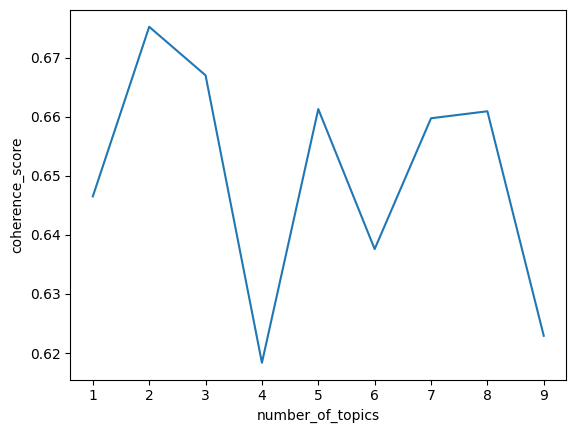

In [ ]:
# Compute coherence score
number_of_topics = []
coherence_score = []
for i in range(1,10):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           iterations=50,
                                           num_topics=i)
  coherence_model_lda = CoherenceModel(model=lda_model,
                                       texts=data_politics.loc[mask, 'tokenized_sents'],
                                       dictionary=id2word,
                                       coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  number_of_topics.append(i)
  coherence_score.append(coherence_lda)

# Create a dataframe of coherence score by number of topics
topic_coherence = pd.DataFrame({'number_of_topics':number_of_topics,
                                'coherence_score':coherence_score})

# Print a line plot
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

## Using the highest peak of the number of topics we are defining the n_topics below.

##NOTE:  Inorder to get a broader idea and insights about users, sometimes we have selected the second highest peak as the number of

In [ ]:
# Define the number of topics
n_topics = 2

# Run the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.161*"government" + 0.030*"people" + 0.016*"federal" + 0.015*"fund" + 0.014*"time" + 0.014*"pay" + 0.012*"covid" + 0.011*"state" + 0.011*"money" + 0.011*"work"
Topic: 1 Word: 0.033*"overthrow" + 0.018*"news" + 0.018*"law" + 0.016*"party" + 0.015*"private" + 0.014*"trump" + 0.013*"school" + 0.010*"fox" + 0.010*"well" + 0.009*"meadows"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Visualizing the LDA modelling for all the topics defined above

In [ ]:
# Import and enable notebook to run visualization
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model,
                                     corpus,
                                     dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.182148  0.0       1        1  54.573447
1     -0.182148  0.0       2        1  45.426553, topic_info=            Term        Freq       Total Category  logprob  loglift
1091  government  619.000000  619.000000  Default  30.0000  30.0000
379    overthrow  104.000000  104.000000  Default  29.0000  29.0000
11        people  115.000000  115.000000  Default  28.0000  28.0000
61          news   58.000000   58.000000  Default  27.0000  27.0000
148          law   57.000000   57.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
872        staff   21.126772   22.837599   Topic2  -5.0172   0.7112
166         well   31.234834   37.421970   Topic2  -4.6262   0.6083
662    political   28.835046   33.987331   Topic2  -4.7061   0.6247
447        women   23.415608   27.386545   Topic2  -4.9143   0.6324
1057     country   22.490456   32.420528   Topic2  -4.9546   0.4234

[107 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1221      1  0.047266    abuse
1221      2  0.992589    abuse
234       1  0.956140    allow
234       2  0.047807    allow
734       1  0.976109  america
...     ...       ...      ...
166       2  0.828390     well
447       1  0.146057    women
447       2  0.839828    women
88        1  0.978111     work
88        2  0.023856     work

[138 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

## Repeating the same process for all clusters

## For Cluster 2

In [ ]:
# Create Dictionary
mask = (data_politics['cluster']==1)
id2word = corpora.Dictionary(data_politics.loc[mask, 'tokenized_sents'])

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_politics['tokenized_sents']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='number_of_topics', ylabel='coherence_score'>

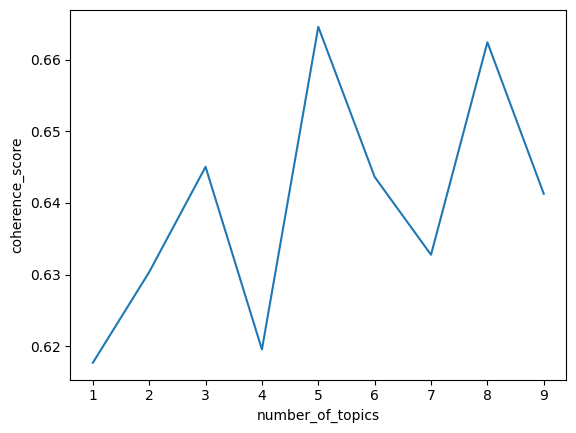

In [ ]:
# Compute coherence score
number_of_topics = []
coherence_score = []
for i in range(1,10):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           iterations=50,
                                           num_topics=i)
  coherence_model_lda = CoherenceModel(model=lda_model,
                                       texts=data_politics.loc[mask, 'tokenized_sents'],
                                       dictionary=id2word,
                                       coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  number_of_topics.append(i)
  coherence_score.append(coherence_lda)

# Create a dataframe of coherence score by number of topics
topic_coherence = pd.DataFrame({'number_of_topics':number_of_topics,
                                'coherence_score':coherence_score})

# Print a line plot
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

In [ ]:
# Define the number of topics
n_topics = 5

# Run the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.057*"state" + 0.035*"guy" + 0.033*"party" + 0.033*"support" + 0.032*"thing" + 0.027*"well" + 0.024*"political" + 0.021*"buy" + 0.019*"pass" + 0.019*"attempt"
Topic: 1 Word: 0.063*"overthrow" + 0.035*"help" + 0.034*"law" + 0.029*"private" + 0.027*"vote" + 0.026*"keep" + 0.026*"good" + 0.025*"american" + 0.020*"find" + 0.019*"company"
Topic: 2 Word: 0.058*"tax" + 0.044*"sure" + 0.043*"america" + 0.033*"trump" + 0.033*"school" + 0.031*"country" + 0.029*"biden" + 0.028*"bill" + 0.022*"meadows" + 0.020*"democracy"
Topic: 3 Word: 0.061*"pay" + 0.054*"covid" + 0.048*"work" + 0.033*"news" + 0.028*"control" + 0.022*"spend" + 0.021*"science" + 0.021*"local" + 0.019*"fox" + 0.019*"play"
Topic: 4 Word: 0.380*"government" + 0.070*"people" + 0.034*"time" + 0.017*"point" + 0.017*"public" + 0.016*"live" + 0.015*"call" + 0.013*"man" + 0.010*"politicians" + 0.010*"better"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Import and enable notebook to run visualization
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model,
                                     corpus,
                                     dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.346167 -0.011128       1        1  24.221628
0     -0.081889  0.057260       2        1  20.665588
2     -0.074240  0.014995       3        1  19.481632
3     -0.086880  0.205733       4        1  18.183531
1     -0.103157 -0.266860       5        1  17.447622, topic_info=            Term        Freq       Total Category  logprob  loglift
974   government  613.000000  613.000000  Default  30.0000  30.0000
42        people  114.000000  114.000000  Default  29.0000  29.0000
1195   overthrow   73.000000   73.000000  Default  28.0000  28.0000
165          pay   74.000000   74.000000  Default  27.0000  27.0000
705          tax   76.000000   76.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
206         care   12.164369   13.025963   Topic5  -4.5582   1.6775
1193    congress   11.965126   12.816380   Topic5  -4.5747   1.6772
982         fire   11.748124   12.602246   Topic5  -4.5930   1.6758
310       future   14.322556   15.386876   Topic5  -4.3949   1.6743
208        guard   12.344071   13.487416   Topic5  -4.5435   1.6574

[192 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
471       3  0.993563   america
290       5  0.961192  american
668       2  0.977733   attempt
709       5  0.918358  attorney
45        1  0.846407       bad
...     ...       ...       ...
21        2  0.986207      well
1045      5  0.954289     women
110       4  0.992433      work
792       2  0.947942     worry
318       2  0.921181      yeah

[170 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 3, 4, 2])

## For Cluster 3

In [ ]:
# Create Dictionary
mask = (data_politics['cluster']==2)
id2word = corpora.Dictionary(data_politics.loc[mask, 'tokenized_sents'])

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_politics['tokenized_sents']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='number_of_topics', ylabel='coherence_score'>

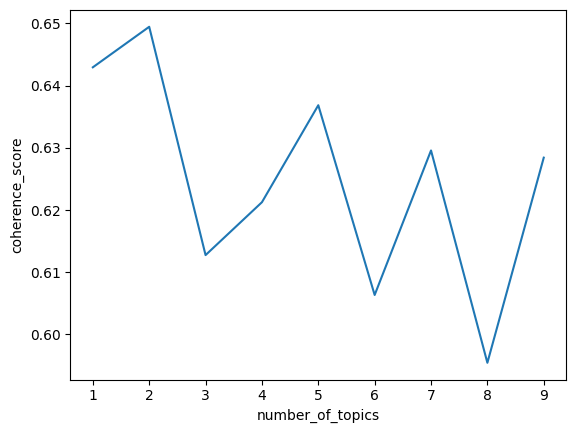

In [ ]:
# Compute coherence score
number_of_topics = []
coherence_score = []
for i in range(1,10):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           iterations=50,
                                           num_topics=i)
  coherence_model_lda = CoherenceModel(model=lda_model,
                                       texts=data_politics.loc[mask, 'tokenized_sents'],
                                       dictionary=id2word,
                                       coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  number_of_topics.append(i)
  coherence_score.append(coherence_lda)

# Create a dataframe of coherence score by number of topics
topic_coherence = pd.DataFrame({'number_of_topics':number_of_topics,
                                'coherence_score':coherence_score})

# Print a line plot
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

In [ ]:
# Define the number of topics
n_topics = 2

# Run the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.081*"government" + 0.022*"people" + 0.010*"pay" + 0.009*"state" + 0.008*"money" + 0.008*"work" + 0.008*"federal" + 0.008*"tax" + 0.006*"force" + 0.006*"help"
Topic: 1 Word: 0.057*"government" + 0.015*"fund" + 0.014*"overthrow" + 0.013*"covid" + 0.008*"time" + 0.007*"private" + 0.007*"call" + 0.006*"trump" + 0.006*"federal" + 0.006*"executive"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Import and enable notebook to run visualization
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model,
                                     corpus,
                                     dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.123766  0.0       1        1  59.573342
1     -0.123766  0.0       2        1  40.426658, topic_info=           Term        Freq       Total Category  logprob  loglift
85       people  119.000000  119.000000  Default  30.0000  30.0000
3          fund   57.000000   57.000000  Default  29.0000  29.0000
295   overthrow   52.000000   52.000000  Default  28.0000  28.0000
631       covid   46.000000   46.000000  Default  27.0000  27.0000
722         pay   55.000000   55.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
74         time   28.495242   56.109296   Topic2  -4.8393   0.2281
1284       sure   18.110297   30.028148   Topic2  -5.2925   0.4000
20      federal   21.744210   62.249133   Topic2  -5.1097  -0.1461
439       allow   12.805922   20.753454   Topic2  -5.6391   0.4229
71        party   12.901802   27.052163   Topic2  -5.6317   0.1653

[118 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
439       1  0.385478     allow
439       2  0.626402     allow
115       1  0.960500   america
115       2  0.033121   america
514       1  0.987845  american
...     ...       ...       ...
75        1  0.063179      week
75        2  0.947682      week
362       1  0.932188      well
362       2  0.044390      well
316       1  0.997764      work

[140 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

## For Cluster 4

In [ ]:
# Create Dictionary
mask = (data_politics['cluster']==3)
id2word = corpora.Dictionary(data_politics.loc[mask, 'tokenized_sents'])

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_politics['tokenized_sents']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='number_of_topics', ylabel='coherence_score'>

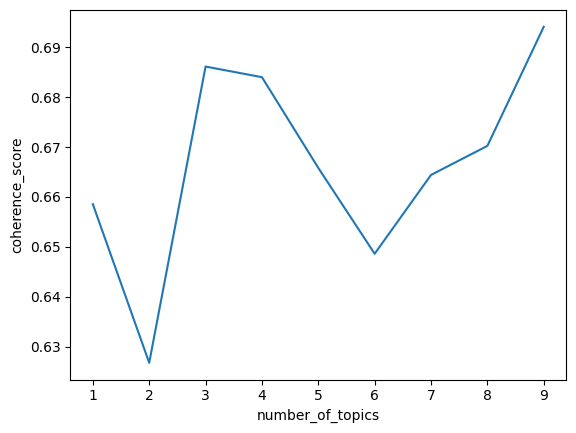

In [ ]:
# Compute coherence score
number_of_topics = []
coherence_score = []
for i in range(1,10):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           iterations=50,
                                           num_topics=i)
  coherence_model_lda = CoherenceModel(model=lda_model,
                                       texts=data_politics.loc[mask, 'tokenized_sents'],
                                       dictionary=id2word,
                                       coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  number_of_topics.append(i)
  coherence_score.append(coherence_lda)

# Create a dataframe of coherence score by number of topics
topic_coherence = pd.DataFrame({'number_of_topics':number_of_topics,
                                'coherence_score':coherence_score})

# Print a line plot
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

In [ ]:
# Define the number of topics
n_topics = 3

# Run the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.352*"government" + 0.024*"money" + 0.016*"help" + 0.016*"pay" + 0.016*"law" + 0.016*"public" + 0.015*"party" + 0.011*"americans" + 0.011*"political" + 0.011*"prove"
Topic: 1 Word: 0.047*"federal" + 0.043*"time" + 0.041*"overthrow" + 0.036*"covid" + 0.035*"state" + 0.032*"work" + 0.022*"point" + 0.022*"guy" + 0.020*"tax" + 0.019*"call"
Topic: 2 Word: 0.094*"people" + 0.046*"fund" + 0.024*"sure" + 0.024*"news" + 0.021*"support" + 0.021*"live" + 0.021*"thing" + 0.020*"control" + 0.018*"school" + 0.018*"keep"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Import and enable notebook to run visualization
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model,
                                     corpus,
                                     dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.267967 -0.070954       1        1  37.462370
2      0.200100 -0.180202       2        1  33.071038
1      0.067867  0.251156       3        1  29.466592, topic_info=            Term        Freq       Total Category  logprob  loglift
13    government  574.000000  574.000000  Default  30.0000  30.0000
50        people  135.000000  135.000000  Default  29.0000  29.0000
332      federal   61.000000   61.000000  Default  28.0000  28.0000
579         fund   67.000000   67.000000  Default  27.0000  27.0000
135         time   55.000000   55.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
21      question    9.050160    9.819734   Topic3  -4.9530   1.1403
505       crisis    9.707746   10.583132   Topic3  -4.8829   1.1356
239  politicians   14.092065   17.956561   Topic3  -4.5102   0.9796
52           tax   25.145013   38.674633   Topic3  -3.9311   0.7914
33           pay   23.756173   51.579037   Topic3  -3.9879   0.4466

[135 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
5         3  0.969218   american
6         1  0.953805  americans
6         3  0.052989  americans
157       2  0.966593     attack
310       1  0.962077     better
...     ...       ...        ...
527       3  0.076780         tv
274       3  0.918552  vaccinate
35        1  0.946943       week
481       2  0.975793       well
4         3  0.978847       work

[122 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

## For Cluster 5

In [ ]:
# Create Dictionary
mask = (data_politics['cluster']==4)
id2word = corpora.Dictionary(data_politics.loc[mask, 'tokenized_sents'])

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_politics['tokenized_sents']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='number_of_topics', ylabel='coherence_score'>

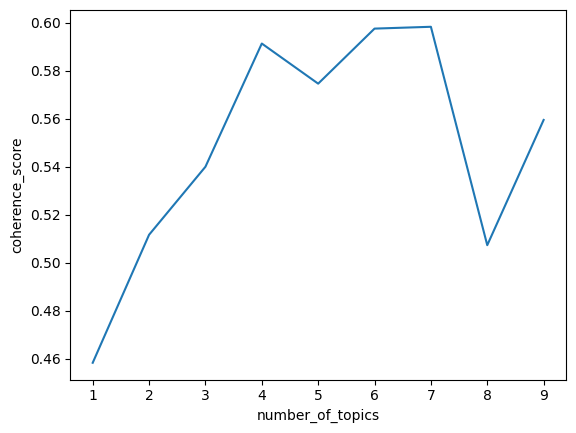

In [ ]:
# Compute coherence score
number_of_topics = []
coherence_score = []
for i in range(1,10):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           iterations=50,
                                           num_topics=i)
  coherence_model_lda = CoherenceModel(model=lda_model,
                                       texts=data_politics.loc[mask, 'tokenized_sents'],
                                       dictionary=id2word,
                                       coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  number_of_topics.append(i)
  coherence_score.append(coherence_lda)

# Create a dataframe of coherence score by number of topics
topic_coherence = pd.DataFrame({'number_of_topics':number_of_topics,
                                'coherence_score':coherence_score})

# Print a line plot
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

In [ ]:
# Define the number of topics
n_topics = 4

# Run the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.092*"state" + 0.084*"work" + 0.058*"news" + 0.058*"america" + 0.053*"support" + 0.043*"american" + 0.040*"biden" + 0.033*"fox" + 0.032*"issue" + 0.030*"hand"
Topic: 1 Word: 0.196*"people" + 0.050*"sure" + 0.048*"point" + 0.041*"call" + 0.039*"vote" + 0.036*"good" + 0.036*"man" + 0.028*"better" + 0.023*"fact" + 0.021*"court"
Topic: 2 Word: 0.145*"time" + 0.047*"coup" + 0.044*"trump" + 0.040*"prosecute" + 0.036*"big" + 0.027*"open" + 0.024*"guard" + 0.023*"millions" + 0.022*"incite" + 0.022*"increase"
Topic: 3 Word: 0.584*"government" + 0.049*"overthrow" + 0.027*"help" + 0.026*"law" + 0.020*"executive" + 0.019*"country" + 0.018*"americans" + 0.014*"meadows" + 0.012*"military" + 0.011*"president"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Import and enable notebook to run visualization
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model,
                                     corpus,
                                     dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.366174  0.022808       1        1  36.892707
1     -0.155960  0.271137       2        1  25.217111
0     -0.116962 -0.275157       3        1  19.934299
2     -0.093252 -0.018789       4        1  17.955883, topic_info=           Term        Freq       Total Category  logprob  loglift
252  government  843.000000  843.000000  Default  30.0000  30.0000
87       people  194.000000  194.000000  Default  29.0000  29.0000
26         time  102.000000  102.000000  Default  28.0000  28.0000
108       state   72.000000   72.000000  Default  27.0000  27.0000
82         work   65.000000   65.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
165    evidence    9.157286   10.359575   Topic4  -4.3395   1.5939
133     primary    8.669861    9.817396   Topic4  -4.3942   1.5929
10        trump   30.635120   38.961533   Topic4  -3.1319   1.4768
290     outlets   10.463272   13.535072   Topic4  -4.2062   1.4598
255    millions   15.796902   31.803068   Topic4  -3.7942   1.0175

[161 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
348       1  0.881602       agree
193       4  0.871354        aide
39        3  0.972427     america
96        3  0.966770    american
250       1  0.970094   americans
...     ...       ...         ...
72        3  0.762543  washington
182       4  0.960962        weak
192       3  0.920270         win
82        3  0.984899        work
73        4  0.940595        york

[153 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3])

# SUMMARIZATION ANALYSIS

## Cleaning the data for the summarization.

In [ ]:
#written by Gina Roh
#pd.set_option('display.max_rows', None)

data_sum_pol = pd.read_csv("/content/sample_data/politicsus_csv.csv")

#clean text but make it still readable.
def clean_readable(text):
  text = remove_username(text)
  text = remove_url(text)
  text = remove_emoji(text)
  text = remove_html(text)
  return text

#data cleaning
data_sum_pol['clean_tweet'] = data_sum_pol['tweet'].apply(lambda x : clean_readable(x))
#add cluster column
data_sum_pol['cluster'] = clusters
data_sum_pol

,user,location,tweet,clean_tweet,cluster
0,Dmarlanawilson,KANSAS,Biden admin admits it left hundreds more US citizens behind in Afghanistan after chaotic withdra...,Biden admin admits it left hundreds more US citizens behind in Afghanistan after chaotic withdra...,1
1,RepKristina,"Green Bay, WI",I hope your mentorship of new leaders will provide critical institutional knowledge and construc...,I hope your mentorship of new leaders will provide critical institutional knowledge and construc...,2
2,rogersonkaren,USA,"'It has gone too far': Listen to Cheney read out texts Trump Jr., Hannity and Ingraham sent to M...","'It has gone too far': Listen to Cheney read out texts Trump Jr., Hannity and Ingraham sent to M...",1
3,le_petit_trek,"Vulcan, Alberta",@maxfawcett This might be the dumbest thing I have ever read about Canadian politics. Well done!,This might be the dumbest thing I have ever read about Canadian politics. Well done!,2
4,Plauterborn,"San Francisco, CA","People are only conservative until it hits them personally. Shocking, I know..\nhttps://t.co/B34...","People are only conservative until it hits them personally. Shocking, I know..\n",1
...,...,...,...,...,...
894,Ga21Renee,Atlanta,"@mattgaetz Why would you want an old man who has NO legal background, NO knowledge of how laws a...","Why would you want an old man who has NO legal background, NO knowledge of how laws and bills a...",0
895,POmi7798,USA,@thechaosdrag0n @digableplanetes @Forbes Well prosecuting Assange under the espionage act for pu...,Well prosecuting Assange under the espionage act for publishing embarrassing information on o...,4
896,tydelrosedrums,"Palmdale, CA",@lnsantucci @thsuburbanmommy Imagine being so brainwashed by mainstream media that you have to r...,Imagine being so brainwashed by mainstream media that you have to resort to using hashtags to ...,0
897,ericowensdc,Chicago IL,@robpennoyer @AriCohn @dalehenrygeist @hypervisible The federal government owns radio airwaves a...,The federal government owns radio airwaves and leases the airwaves to station owners.\n\nThe...,0


In [ ]:
#written by Gina Roh
pd.set_option('display.max_colwidth',1200)

#data_sum_copy = data_sum_tech.copy()
data_sum_copy = data.copy()

#concatenate all the tweets within each cluster to form a single document for each cluster
data_sum_copy['tweet'] = data_sum_copy.groupby(['cluster'])['tweet'].transform(lambda x : '. '.join(x))
data_sum_final = data_sum_copy.drop_duplicates(subset=['tweet'])
data_sum_final

,user,location,tweet,tokenized_sents,cluster,vader_scores,agg_vader_score,afinn_scores,agg_afinn_score
0,Dmarlanawilson,KANSAS,biden admin admit leave hundreds citizens afghanistan chaotic withdrawal. listen cheney read texts trump jr hannity ingraham send meadows jan. people conservative hit personally shock. icymi crazy major cities hit time homicide record trump donaldtrump republican conservative trump maga kag usa politics read full article. march trump bus tour throw bus jan insurrection. pretty damn. january committee vote hold meadows contempt congress. trump tease vp candidates ron desantis good. conservative group target tester sinema kelly. ship suppose regular patients covid patients hospitals room covids alliwed ship tent covid patients. guy car protect head hand hit head kill hit head hand. pay gas price shut herschel walker son mock critics expensive hoodie bash biden gas price rich smartnews. wsj biden stagflation usa america biden trump trump freedom patriots democrats republicans inflation gasprices bidenflation economy politics. shock fox news bury trumpcoupattempt shock ya sarcasm limit. opinion trump deliver georgia democrats holiday gift. ontario unveil restrictions protect nurse residents covid work offer boosters sooner jan omicron variant spread rapidly predict days ago. house ...,"[biden, admin, admit, leave, hundreds, citizens, afghanistan, chaotic, withdrawal]",1,"[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2023}, {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.0516}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4939}, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.0258}]",-0.035267,"[0.0, 0.0, -1.0, -1.0, 0.0, 0.0, 0.0, -2.0, -3.0]",-0.777778
1,RepKristina,"Green Bay, WI",hope mentorship leaders provide critical institutional knowledge constructive feedback continue legacy progressive movement base politics state years. dumbest thing read canadian politics well. enjoy electoral politics interest represent areas decide district boundaries change years. people pretty hate fanaticism politics annoy git texted call expect hear kind detail years lot happen. question mattio politics break country rid republicans bad shape. identity politics identify white people keep understand history bore. haha brother phd humble politics meteorology astrophysics um yep sure. entire thread psychopaths politics families. hate listen cishet men talk politics minutes. talk politics company discussion politics house abide rule. despise mix religion politics sport religion politics. grind politics surprise quote lt gov state local rise star. guess suntup century work speculative fiction masterfully write tale explore broad range issue relate power gender religious politics. performative bullshit elect officials behave progressive sanctuary cities fuck country fuck electoral politics. classic santa cruz politics rich hippies upper west side vote politicians enact policies...,"[hope, mentorship, leaders, provide, critical, institutional, knowledge, constructive, feedback, continue, legacy, progressive, movement, base, politics, state, years]",2,"[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3182}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'com

## Using SUMY and Lexrank summarizer for summarizing the top tweets

In [ ]:
#written by Gina Roh
import textwrap
import sumy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

print("LexRank")
for i in range(5):
  print ("----------")
  print ("Cluster %d:" % i)
  document1 = data_sum_final.loc[data_sum_final['cluster'].eq(i), 'tweet'].astype(str)
  document1 = str(document1)[4:].strip()
  parser = PlaintextParser.from_string(document1,Tokenizer("english"))

  #using LexRank
  summarizer = LexRankSummarizer()
  #summarize the document with seven sentence
  summary = summarizer(parser.document, 7)

  #The first five unduplicated sentences are printed
  num = 0
  sum_result = []
  for sentence in summary:
    if str(sentence) not in sum_result:
      sum_result.append(str(sentence))
      num += 1
    if num == 5:
      break

  # Wrap this text
  wrapper = textwrap.TextWrapper(width=100)
  word_list = wrapper.wrap(text=" ".join(sum_result))

  # Print each line
  for element in word_list:
      print(element)

LexRank
----------
Cluster 0:
nakasone month government conduct surge ransomware operators include cut hackers source fund
cybersecurity. absolutely agree provincial politics continue hinder achieve respond effectively
global emergency national pandemic response current federal government learn implement lessons sars.
president joe biden federal government surge aid kentucky illinois swarm deadly tornadoes pummel
entire communities midwest politics. sen roger marshall question biden win election meet press
interview marshall extreme greedy anti american work destroy democracy install russian style
government republicans rule oppress americans. government open amend pay sick leave bill pass week.
----------
Cluster 1:
biden admin admit leave hundreds citizens afghanistan chaotic withdrawal. listen cheney read texts
trump jr hannity ingraham send meadows jan. people conservative hit personally shock. icymi crazy
major cities hit time homicide record trump donaldtrump republican conservat

## Using Luhn summarizer for summarizing the top tweets

In [ ]:
#written by Gina Roh
from sumy.summarizers.luhn import LuhnSummarizer

print("Luhn")
for i in range(5):
  print ("----------")
  print ("Cluster %d:" % i)
  document1 = data_sum_final.loc[data_sum_final['cluster'].eq(i), 'tweet'].astype(str)
  document1 = str(document1)[4:].strip()
  parser = PlaintextParser.from_string(document1,Tokenizer("english"))

  #using Luhn
  summarizer_luhn = LuhnSummarizer()
  #summarize the document with seven sentence
  summary_l =summarizer_luhn(parser.document,7)

  #The first five unduplicated sentences are printed
  num = 0
  sum_result = []
  for sentence in summary_l:
    if str(sentence) not in sum_result:
      sum_result.append(str(sentence))
      num += 1
    if num == 5:
      break

  # Wrap this text
  wrapper = textwrap.TextWrapper(width=100)
  word_list = wrapper.wrap(text=" ".join(sum_result))

  # Print each line
  for element in word_list:
      print(element)

Luhn
----------
Cluster 0:
nakasone month government conduct surge ransomware operators include cut hackers source fund
cybersecurity. absolutely agree provincial politics continue hinder achieve respond effectively
global emergency national pandemic response current federal government learn implement lessons sars.
president joe biden federal government surge aid kentucky illinois swarm deadly tornadoes pummel
entire communities midwest politics. sen roger marshall question biden win election meet press
interview marshall extreme greedy anti american work destroy democracy install russian style
government republicans rule oppress americans. america easy government worry politics boosters
special interest.
----------
Cluster 1:
listen cheney read texts trump jr hannity ingraham send meadows jan. people conservative hit
personally shock. icymi crazy major cities hit time homicide record trump donaldtrump republican
conservative trump maga kag usa politics read full article. march trump b

## Both the summarizers gave similar results and we have used both to compare with the normal summarizer and get insights for the same.

In [ ]:
#make panda's max_cowidth setting back
pd.set_option('display.max_colwidth',100)